# TCC

## 1 - Library Imports

In [436]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
pd.reset_option('display.max_rows')
plt.style.use('seaborn-v0_8')

plt.style.available


from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import roc_curve, roc_auc_score





## 2 - Data Cleaning

In [437]:

# Substitua 'caminho_para_seu_arquivo.csv' pelo caminho do seu arquivo CSV
file = 'exoplanets_confirmed.csv'
df = pd.read_csv(file)

df.head()

C:\Users\Usuario\AppData\Local\Temp\ipykernel_10868\3167806344.py:3: DtypeWarning: Columns (4,5) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file)


,rowid,pl_name,hostname,pl_letter,hd_name,hip_name,tic_id,gaia_id,default_flag,sy_snum,sy_pnum,sy_mnum,cb_flag,discoverymethod,disc_year,disc_refname,disc_pubdate,disc_locale,disc_facility,disc_telescope,disc_instrument,rv_flag,pul_flag,ptv_flag,tran_flag,ast_flag,obm_flag,micro_flag,etv_flag,ima_flag,dkin_flag,soltype,pl_controv_flag,pl_refname,pl_orbper,pl_orbpererr1,pl_orbpererr2,pl_orbperlim,pl_orbsmax,pl_orbsmaxerr1,pl_orbsmaxerr2,pl_orbsmaxlim,pl_rade,pl_radeerr1,pl_radeerr2,pl_radelim,pl_radj,pl_radjerr1,pl_radjerr2,pl_radjlim,pl_masse,pl_masseerr1,pl_masseerr2,pl_masselim,pl_massj,pl_massjerr1,pl_massjerr2,pl_massjlim,pl_msinie,pl_msinieerr1,pl_msinieerr2,pl_msinielim,pl_msinij,pl_msinijerr1,pl_msinijerr2,pl_msinijlim,pl_cmasse,pl_cmasseerr1,pl_cmasseerr2,pl_cmasselim,pl_cmassj,pl_cmassjerr1,pl_cmassjerr2,pl_cmassjlim,pl_bmasse,pl_bmasseerr1,pl_bmasseerr2,pl_bmasselim,pl_bmassj,pl_bmassjerr1,pl_bmassjerr2,pl_bmassjlim,pl_bmassprov,pl_dens,pl_denserr1,pl_denserr2,pl_denslim,pl_orbeccen,pl_orbeccenerr1,pl_orbeccenerr2,pl_orbeccenlim,pl_insol,pl_insolerr1,pl_insolerr2,pl_insollim,pl_eqt,pl_eqterr1,pl_eqterr2,pl_eqtlim,pl_orbincl,pl_orbinclerr1,pl_orbinclerr2,pl_orbincllim,pl_tranmid,pl_tranmiderr1,pl_tranmiderr2,pl_tranmidlim,pl_tsystemref,ttv_flag,pl_imppar,pl_impparerr1,pl_impparerr2,pl_impparlim,pl_trandep,pl_trandeperr1,pl_trandeperr2,pl_trandeplim,pl_trandur,pl_trandurerr1,pl_trandurerr2,pl_trandurlim,pl_ratdor,pl_ratdorerr1,pl_ratdorerr2,pl_ratdorlim,pl_ratror,pl_ratrorerr1,pl_ratrorerr2,pl_ratrorlim,pl_occdep,pl_occdeperr1,pl_occdeperr2,pl_occdeplim,pl_orbtper,pl_orbtpererr1,pl_orbtpererr2,pl_orbtperlim,pl_orblper,pl_orblpererr1,pl_orblpererr2,pl_orblperlim,pl_rvamp,pl_rvamperr1,pl_rvamperr2,pl_rvamplim,pl_projobliq,pl_projobliqerr1,pl_projobliqerr2,pl_projobliqlim,pl_trueobliq,pl_trueobliqerr1,pl_trueobliqerr2,pl_trueobliqlim,st_refname,st_spectype,st_teff,st_tefferr1,st_tefferr2,st_tefflim,st_rad,st_raderr1,st_raderr2,st_radlim,st_mass,st_masserr1,st_masserr2,st_masslim,st_met,st_meterr1,st_meterr2,st_metlim,st_metratio,st_lum,st_lumerr1,st_lumerr2,st_lumlim,st_logg,st_loggerr1,st_loggerr2,st_logglim,st_age,st_ageerr1,st_ageerr2,st_agelim,st_dens,st_denserr1,st_denserr2,st_denslim,st_vsin,st_vsinerr1,st_vsinerr2,st_vsinlim,st_rotp,st_rotperr1,st_rotperr2,st_rotplim,st_radv,st_radverr1,st_radverr2,st_radvlim,sy_refname,rastr,ra,decstr,dec,glat,glon,elat,elon,sy_pm,sy_pmerr1,sy_pmerr2,sy_pmra,sy_pmraerr1,sy_pmraerr2,sy_pmdec,sy_pmdecerr1,sy_pmdecerr2,sy_dist,sy_disterr1,sy_disterr2,sy_plx,sy_plxerr1,sy_plxerr2,sy_bmag,sy_bmagerr1,sy_bmagerr2,sy_vmag,sy_vmagerr1,sy_vmagerr2,sy_jmag,sy_jmagerr1,sy_jmagerr2,sy_hmag,sy_hmagerr1,sy_hmagerr2,sy_kmag,sy_kmagerr1,sy_kmagerr2,sy_umag,sy_umagerr1,sy_umagerr2,sy_gmag,sy_gmagerr1,sy_gmagerr2,sy_rmag,sy_rmagerr1,sy_rmagerr2,sy_imag,sy_imagerr1,sy_imagerr2,sy_zmag,sy_zmagerr1,sy_zmagerr2,sy_w1mag,sy_w1magerr1,sy_w1magerr2,sy_w2mag,sy_w2magerr1,sy_w2magerr2,sy_w3mag,sy_w3magerr1,sy_w3magerr2,sy_w4mag,sy_w4magerr1,sy_w4magerr2,sy_gaiamag,sy_gaiamagerr1,sy_gaiamagerr2,sy_icmag,sy_icmagerr1,sy_icmagerr2,sy_tmag,sy_tmagerr1,sy_tmagerr2,sy_kepmag,sy_kepmagerr1,sy_kepmagerr2,rowupdate,pl_pubdate,releasedate,pl_nnotes,st_nphot,st_nrvc,st_nspec,pl_nespec,pl_ntranspec
0,1,11 Com b,11 Com,b,HD 107383,HIP 60202,TIC 72437047,Gaia DR2 3946945413106333696,0,2,1,0,0,Radial Velocity,2007,<a refstr=LIU_ET_AL__2008 href=https://ui.adsa...,2008-01,Ground,Xinglong Station,2.16 m Telescope,Coude Echelle Spectrograph,1,0,0,0,0,0,0,0,0,0,Published Confirmed,0,<a refstr=KUNITOMO_ET_AL__2011 href=https://ui...,NaN,NaN,NaN,NaN,1.210,0.06,-0.05,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5434.70000,540.30000,-413.20000,0.0,17.100,1.700,-1.300,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5434.70000,540.30000,-413.20000,0.0,17.100,1.700,-1.300,0.0,Msini,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,

### 2.2 Sweetviz Report

file:///C:/downloaded/SWEETVIZ_REPORT.html

### 2.3 Droping Columns

In [438]:
df_filtered_1 = df[df['pl_controv_flag'] != 1] # removed the controversial columns, because that data is not interesting to us
# Filter the DataFrame to keep rows where pl_orbperlim is 0 or NaN
#df_filtered_2 = df_filtered_1[df_filtered_1['pl_orbperlim'].isin([0]) | df_filtered_1['pl_orbperlim'].isna()]
#df_filtered_3 = df_filtered_2[df_filtered_2['pl_orbsmaxlim'].isin([0]) | df_filtered_2['pl_orbsmaxlim'].isna()]
#df_filtered_4 = df_filtered_3[df_filtered_3['pl_radelim'].isin([0]) | df_filtered_3['pl_radelim'].isna()]
#df_filtered_5 = df_filtered_4[df_filtered_4['pl_radjlim'].isin([0]) | df_filtered_4['pl_radjlim'].isna()]
#df_filtered_6 = df_filtered_5[df_filtered_5['pl_msinielim'].isin([0]) | df_filtered_5['pl_msinielim'].isna()]
#df_filtered_7 = df_filtered_6[df_filtered_6['pl_msinijlim'].isin([0]) | df_filtered_6['pl_msinijlim'].isna()]

columns_to_drop = ['sy_mnum', 'disc_pubdate', 'disc_refname', 'dkin_flag', 
                   'ima_flag', 'etv_flag', 'micro_flag', 'obm_flag', 'ast_flag',
                     'tran_flag', 'ptv_flag', 'pul_flag', 'rv_flag', 'pl_controv_flag',
                     'pl_refname', 'pl_orbperlim', 'pl_orbsmaxlim', 'pl_orbeccenlim',
                     'pl_orbsmaxlim','pl_orbsmaxerr1', 'pl_orbsmaxerr2',
                     'pl_radelim', 'pl_radeerr1', 'pl_radeerr2',
                     'pl_radjlim', 'pl_radjerr1', 'pl_radjerr2',
                     'pl_msinielim', 'pl_msinieerr1', 'pl_msinieerr2',
                     'pl_msinijlim', 'pl_msinijerr1', 'pl_msinijerr2',
                     'pl_cmasseerr1', 'pl_cmasseerr2', 'pl_cmasselim',
                     'pl_cmassjerr1', 'pl_cmassjerr2', 'pl_cmassjlim',
                     'pl_insolerr1', 'pl_insolerr2', 'pl_insollim',
                     'pl_eqterr1', 'pl_eqterr2', 'pl_eqtlim',
                     'pl_orbinclerr1', 'pl_orbinclerr2', 'pl_orbincllim',
                     'pl_tranmiderr1', 'pl_tranmiderr2', 'pl_tranmidlim',
                     'pl_impparerr1', 'pl_impparerr2', 'pl_impparlim',
                     'pl_trandeperr1', 'pl_trandeperr2', 'pl_trandeplim',
                      'pl_trandurerr1', 'pl_trandurerr2', 'pl_trandurlim',
                     'pl_ratdorerr1', 'pl_ratdorerr2', 'pl_ratdorlim',
                     'pl_ratrorerr1', 'pl_ratrorerr2', 'pl_ratrorlim',
                     'pl_occdeperr1', 'pl_occdeperr2', 'pl_occdeplim',
                     'pl_orbtpererr1', 'pl_orbtpererr2', 'pl_orbtperlim',
                     'pl_orblpererr1', 'pl_orblpererr2', 'pl_orblperlim',
                     'pl_projobliqerr1', 'pl_projobliqerr2', 'pl_projobliqlim',
                     'pl_trueobliqerr1', 'pl_trueobliqerr2', 'pl_trueobliqlim',
                     'st_refname', 'st_tefferr1', 'st_tefferr2', 'st_tefflim',
                     'st_raderr1', 'st_raderr2', 'st_radlim',
                     'st_masserr1', 'st_masserr2', 'st_masslim',
                     'st_meterr1', 'st_meterr2', 'st_metlim',
                     'st_lumerr1', 'st_lumerr2', 'st_lumlim',
                     'st_loggerr1', 'st_loggerr2', 'st_logglim',
                     'st_ageerr1', 'st_ageerr2', 'st_agelim',
                     'st_denserr1', 'st_denserr2', 'st_denslim',
                     'st_rotperr1', 'st_rotperr2', 'st_rotplim',
                     'st_radverr1', 'st_radverr2', 'st_radvlim',
                     'sy_refname', 'sy_pmerr1', 'sy_pmerr2',
                     'sy_pmraerr1', 'sy_pmraerr2', 'sy_pmdecerr1', 'sy_pmdecerr2',
                     'sy_disterr1', 'sy_disterr2', 'sy_plxerr1', 'sy_plxerr2',
                     'sy_bmagerr1', 'sy_bmagerr2', 'sy_vmagerr1', 'sy_vmagerr2',
                     'sy_jmagerr1', 'sy_jmagerr2', 'sy_hmagerr1', 'sy_hmagerr2',
                     'sy_kmagerr1', 'sy_kmagerr2', 'sy_umagerr1', 'sy_umagerr2',
                     'sy_gmagerr1', 'sy_gmagerr2', 'sy_rmagerr1', 'sy_rmagerr2',
                     'sy_imagerr1', 'sy_imagerr2', 'sy_zmagerr1', 'sy_zmagerr2',
                     'sy_w1magerr1', 'sy_w1magerr2', 'sy_w2magerr1', 'sy_w2magerr2',
                     'sy_w3magerr1', 'sy_w3magerr2', 'sy_w4magerr1', 'sy_w4magerr2',
                     'sy_gaiamagerr1', 'sy_gaiamagerr2', 'sy_icmagerr1', 'sy_icmagerr2',
                     'sy_tmagerr1', 'sy_tmagerr2', 'sy_kepmagerr1', 'sy_kepmagerr2',
                     'pl_orbpererr1', 'pl_orbpererr2', 'pl_masseerr1', 'pl_masseerr2',
                     'pl_masselim', 'pl_massjerr1', 'pl_massjerr2', 'pl_massjlim',
                     'pl_bmasseerr1', 'pl_bmasseerr2', 'pl_bmasselim', 'pl_bmassjerr1',
                     'pl_bmassjerr2', 'pl_bmassjlim', 'pl_radeerr1', 'pl_denserr1',
                      'pl_denserr2', 'pl_denslim', 'pl_orbeccenerr1', 'pl_orbeccenerr2',
                      'pl_rvamperr1', 'pl_rvamperr2', 'pl_rvamplim', 'st_vsinerr1',
                      'st_vsinerr2'

                     ] 
# removed columns that have no information or are not interesting to us
#flags, moons, reference, publication dates
#all exoplanets have zero moons? not true, we just don't have this information
df_filtered_2 = df_filtered_1.drop(columns=columns_to_drop)
pd.set_option('display.max_columns', None)

df_filtered_3 = df_filtered_2[df_filtered_2['default_flag'] == 1] # removed the non-default columns
df_filtered_3


,rowid,pl_name,hostname,pl_letter,hd_name,hip_name,tic_id,gaia_id,default_flag,sy_snum,sy_pnum,cb_flag,discoverymethod,disc_year,disc_locale,disc_facility,disc_telescope,disc_instrument,soltype,pl_orbper,pl_orbsmax,pl_rade,pl_radj,pl_masse,pl_massj,pl_msinie,pl_msinij,pl_cmasse,pl_cmassj,pl_bmasse,pl_bmassj,pl_bmassprov,pl_dens,pl_orbeccen,pl_insol,pl_eqt,pl_orbincl,pl_tranmid,pl_tsystemref,ttv_flag,pl_imppar,pl_trandep,pl_trandur,pl_ratdor,pl_ratror,pl_occdep,pl_orbtper,pl_orblper,pl_rvamp,pl_projobliq,pl_trueobliq,st_spectype,st_teff,st_rad,st_mass,st_met,st_metratio,st_lum,st_logg,st_age,st_dens,st_vsin,st_vsinlim,st_rotp,st_radv,rastr,ra,decstr,dec,glat,glon,elat,elon,sy_pm,sy_pmra,sy_pmdec,sy_dist,sy_plx,sy_bmag,sy_vmag,sy_jmag,sy_hmag,sy_kmag,sy_umag,sy_gmag,sy_rmag,sy_imag,sy_zmag,sy_w1mag,sy_w2mag,sy_w3mag,sy_w4mag,sy_gaiamag,sy_icmag,sy_tmag,sy_kepmag,rowupdate,pl_pubdate,releasedate,pl_nnotes,st_nphot,st_nrvc,st_nspec,pl_nespec,pl_ntranspec
2,3,11 Com b,11 Com,b,HD 107383,HIP 60202,TIC 72437047,Gaia DR2 3946945413106333696,1,2,1,0,Radial Velocity,2007,Ground,Xinglong Station,2.16 m Telescope,Coude Echelle Spectrograph,Published Confirmed,323.210000,1.178000,NaN,NaN,NaN,NaN,4914.89849,15.4640,NaN,NaN,4914.89849,15.4640,Msini,NaN,0.2380,NaN,NaN,NaN,NaN,JD,0,NaN,NaN,NaN,NaN,NaN,NaN,2454519.400,91.330,288.630,NaN,NaN,G8 III,4874.0,13.76,2.09,-0.26,[Fe/H],1.978,2.45,NaN,NaN,NaN,NaN,NaN,NaN,12h20m42.91s,185.178779,+17d47m35.71s,17.793252,78.28058,264.13775,18.33392,177.41790,140.383627,-109.24100,88.1701,93.1846,10.71040,5.726,4.72307,2.943,2.484,2.282,NaN,NaN,NaN,NaN,NaN,0.639,0.732,2.358,2.270,4.44038,NaN,3.83790,NaN,2023-09-19,2023-08,2023-09-19,2,1,2,0,0,0
3,4,11 UMi b,11 UMi,b,HD 136726,HIP 74793,TIC 230061010,Gaia DR2 1696798367260229376,1,1,1,0,Radial Velocity,2009,Ground,Thueringer Landessternwarte Tautenburg,2.0 m Alfred Jensch Telescope,Coude Echelle Spectrograph,Published Confirmed,516.219970,1.530000,NaN,NaN,NaN,NaN,4684.81420,14.7400,NaN,NaN,4684.81420,14.7400,Msini,NaN,0.0800,NaN,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,189.700,NaN,NaN,NaN,4213.0,29.79,2.78,-0.02,[Fe/H],NaN,1.93,NaN,NaN,NaN,NaN,NaN,NaN,15h17m05.90s,229.274595,+71d49m26.19s,71.823943,41.04437,108.71900,74.95821,141.64699,10.679019,3.42996,10.1132,125.3210,7.95388,6.382,5.01300,2.876,2.091,1.939,NaN,NaN,NaN,NaN,NaN,-0.290,0.143,1.894,1.787,4.56216,NaN,3.82294,NaN,2018-09-04,2017-03,2018-09-06,0,1,1,0,0,0
6,7,14 And b,14 And,b,HD 221345,HIP 116076,TIC 333225860,Gaia DR2 1920113512486282240,1,1,1,0,Radial Velocity,2008,Ground,Okayama Astrophysical Observatory,1.88 m Telescope,HIDES Echelle Spectrograph,Published Confirmed,186.760000,0.775000,NaN,NaN,NaN,NaN,1131.15130,3.5590,NaN,NaN,1131.15130,3.5590,Msini,NaN,0.0000,NaN,NaN,NaN,NaN,JD,0,NaN,NaN,NaN,NaN,NaN,NaN,2452853.000,0.000,86.080,NaN,NaN,K0 III,4888.0,11.55,1.78,-0.21,[Fe/H],1.840,2.55,NaN,NaN,NaN,NaN,NaN,NaN,23h31m17.80s,352.824150,+39d14m09.01s,39.235837,-21.05141,106.41269,38.22901,11.95935,299.252618,287.29200,-83.7582,75.4392,13.22890,6.256,5.23133,3.019,2.608,2.331,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.91781,NaN,4.32140,NaN,2023-09-19,2023-08,2023-09-19,0,1,1,0,0,0
11,12,14 Her b,14 Her,b,HD 145675,HIP 79248,TIC 219483057,Gaia DR2 1385293808145621504,1,1,2,0,Radial Velocity,2002,Ground,W. M. Keck Observatory,10 m Keck I Telescope,HIRES Spectrometer,Published Confirmed,1765.038900,2.774000,NaN,NaN,2559.47216,8.053,NaN,NaN,NaN,NaN,2559.47216,8.0530,Mass,NaN,0.3730,NaN,NaN,144.652,NaN,BJD,0,NaN,NaN,NaN,NaN,NaN,NaN,2449614.563,23.043,89.582,NaN,NaN,NaN,NaN,NaN,0.91,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,16h10m24.50s,242.602101,+43d48m58.90s,43.816362,46.94447,69.16849,62.87885,223.24717,324.530306,132.01900,-296.4640,17.9323,55.73630,7.495,6.61935,5.158,4.803,4.714,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.38300,NaN,5.86310,NaN,2023-06-12,2022-09,2023-06-12,0,1,4,1,0,0
22,23,16 Cyg B b,16 Cyg B,b,HD 186427,HIP 96901,TIC 27533327,Gaia DR2 2135550755683407232,1,3,1,0,Radial Velocity,1

In [439]:
# Exporta df_filtered_3 como um arquivo CSV
#df_filtered_2.to_csv('df_filtered_3.csv', index=False)

### 2.4 Rename Columns

In [440]:
df_filtered_3.rename(columns={'cb_flag': 'circumbinary_flag', 'sy_snum': 'star_number', 'disc_facility': 'discovery_facility',
                              'disc_telescope': 'discovery_telescope', 'disc_instrument': 'discovery_instrument'}, inplace=True)


C:\Users\Usuario\AppData\Local\Temp\ipykernel_10868\1365595247.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered_3.rename(columns={'cb_flag': 'circumbinary_flag', 'sy_snum': 'star_number', 'disc_facility': 'discovery_facility',


## 3 - Data Analysis

### 3.1 - circumbinary systems vs number of stars

circumbinary systems are systems where the planet orbits two starts. 
So here, we want to compare a system that is circumbinary with its number of stars

<Axes: xlabel='star_number', ylabel='circumbinary_flag'>

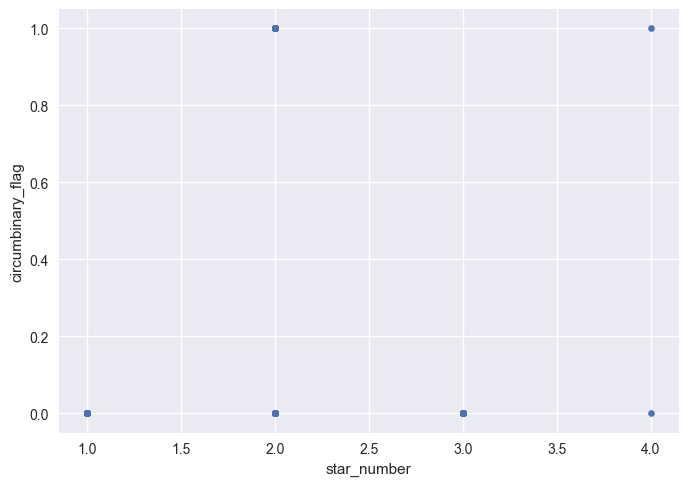

In [441]:
df_explore = df_filtered_3[['circumbinary_flag', 'star_number']]
df_explore.head()
df_explore.plot.scatter(x='star_number', y='circumbinary_flag')

<Axes: title={'center': 'Count of Each Category in circumbinary_flag'}, xlabel='circumbinary_flag'>

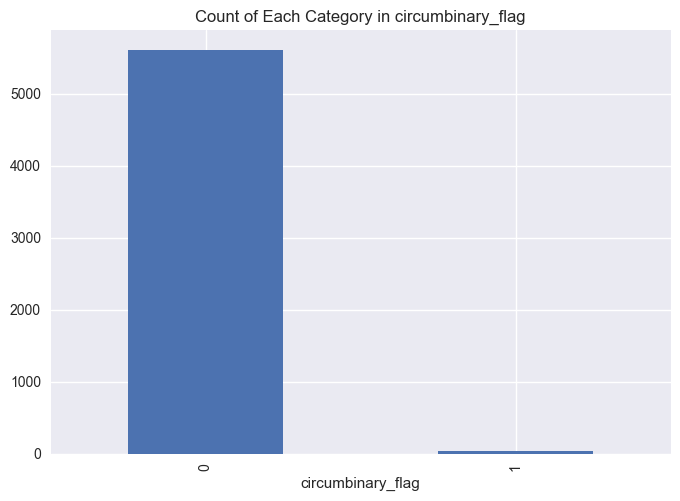

In [442]:
df_explore['circumbinary_flag'].value_counts().plot.bar(title='Count of Each Category in circumbinary_flag')

<Axes: title={'center': 'Distribution of Number of Stars in a System'}, ylabel='Frequency'>

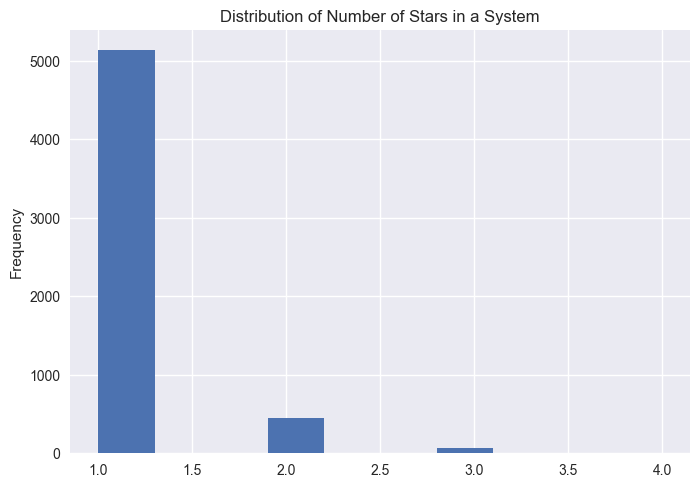

In [443]:
df_explore['star_number'].plot.hist( title='Distribution of Number of Stars in a System')

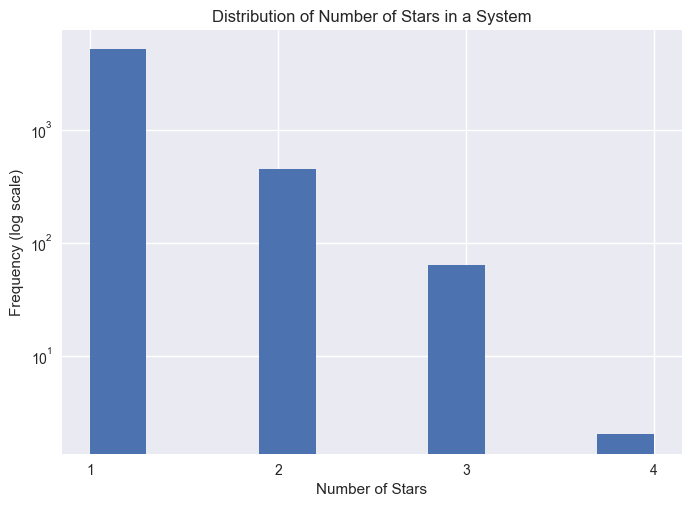

In [444]:
import matplotlib.pyplot as plt

# Plot the histogram
df_explore['star_number'].plot.hist(title='Distribution of Number of Stars in a System', log=True)

# Set the x-axis ticks to be integers
plt.xticks(range(int(df_explore['star_number'].min()), int(df_explore['star_number'].max()) + 1))

# Show the plot
plt.xlabel('Number of Stars')
plt.ylabel('Frequency (log scale)')
plt.show()

Text(0, 0.5, 'Number of Stars in a System')

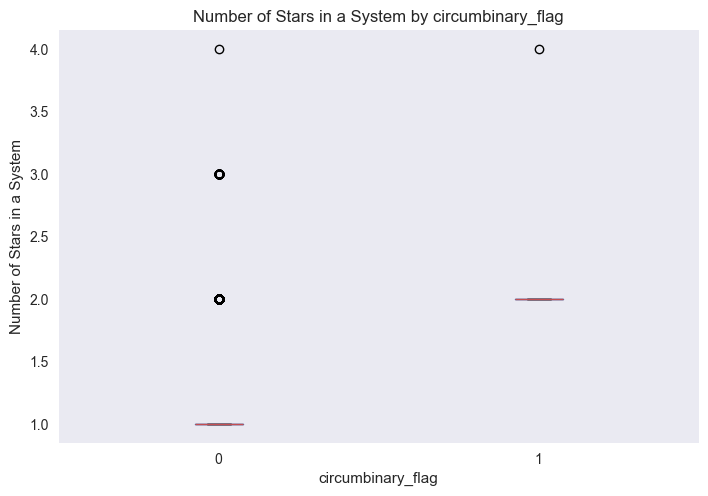

In [445]:
df_explore.boxplot(column='star_number', by='circumbinary_flag', grid=False)
plt.title('Number of Stars in a System by circumbinary_flag')
plt.suptitle('')  # Suppress the default title to avoid overlap
plt.xlabel('circumbinary_flag')
plt.ylabel('Number of Stars in a System')

### 3.2 Discovery telescopes analysis

C:\Users\Usuario\AppData\Local\Temp\ipykernel_10868\413354438.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered_3['discovery_telescope'] = df_filtered_3['discovery_telescope'].replace(to_replace, 'Other')


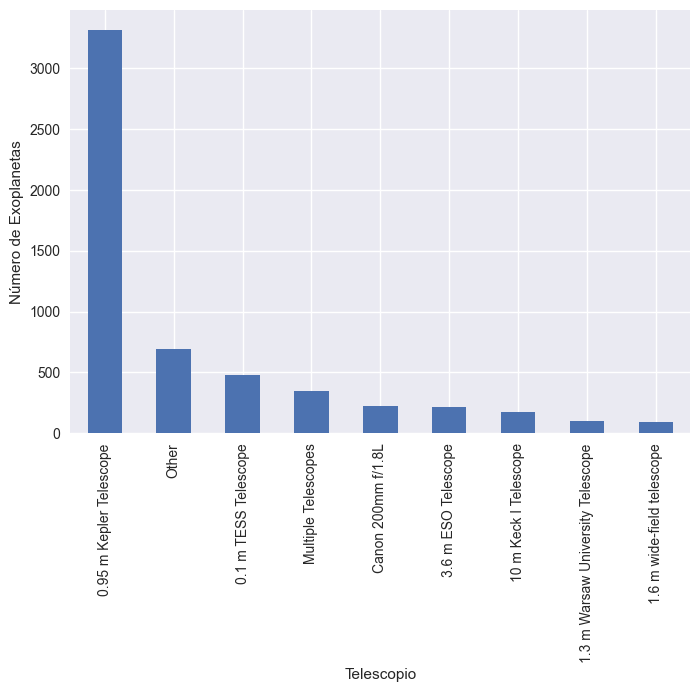

In [446]:
# Calculate value counts
value_counts = df_filtered_3['discovery_telescope'].value_counts()

# Identify values with counts less than 85
to_replace = value_counts[value_counts < 85].index

# Replace these values with "Other"
df_filtered_3['discovery_telescope'] = df_filtered_3['discovery_telescope'].replace(to_replace, 'Other')

# Plot the updated value counts
df_filtered_3['discovery_telescope'].value_counts().plot.bar()
plt.xlabel('Telescopio')
plt.ylabel('Número de Exoplanetas')
plt.show()
# Canon 200mm f/1.8L marked as discovery_telescope in two different projects, thats why its the second most used telescope
# https://science.nasa.gov/mission/kepler/


### 3.3 Discovery instrument analysis

C:\Users\Usuario\AppData\Local\Temp\ipykernel_10868\2385058711.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered_3['discovery_instrument'] = df_filtered_3['discovery_instrument'].replace(to_replace, 'Others')


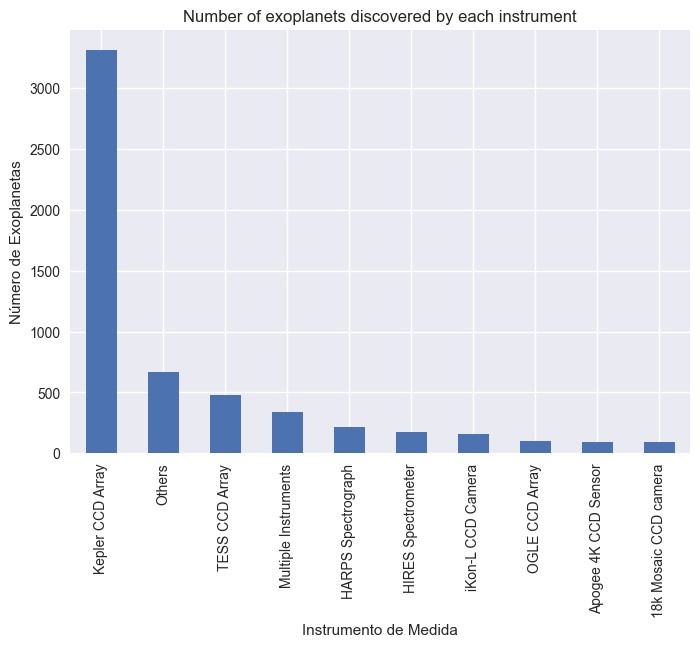

In [447]:
# Calculate value counts
value_counts = df_filtered_3['discovery_instrument'].value_counts()

# Identify values with counts less than 80
to_replace = value_counts[value_counts < 80].index

# Replace these values with "Others"
df_filtered_3['discovery_instrument'] = df_filtered_3['discovery_instrument'].replace(to_replace, 'Others')

# Plot the updated value counts
df_filtered_3['discovery_instrument'].value_counts().plot.bar(title='Number of exoplanets discovered by each instrument')
plt.xlabel('Instrumento de Medida')
plt.ylabel('Número de Exoplanetas')
plt.show()

### 3.4 Discovery facility analysis

K2 is a different mission than kepler, after it had some issues, they changed the way of operation of the satellite.

C:\Users\Usuario\AppData\Local\Temp\ipykernel_10868\390999423.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered_3['discovery_facility'] = df_filtered_3['discovery_facility'].replace('Transiting Exoplanet Survey Satellite (TESS)', 'TESS')
C:\Users\Usuario\AppData\Local\Temp\ipykernel_10868\390999423.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered_4['discovery_facility'] = df_filtered_4['discovery_facility'].replace(to_replace, 'Others')


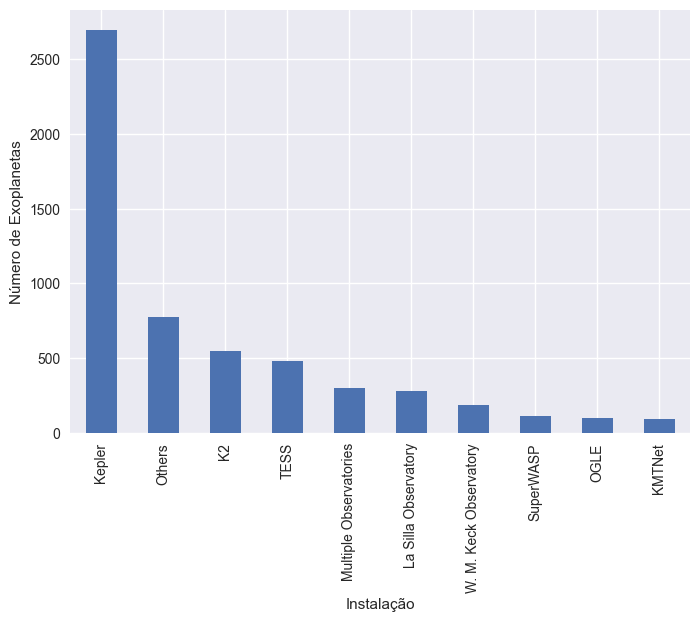

,rowid,pl_name,hostname,pl_letter,hd_name,hip_name,tic_id,gaia_id,default_flag,star_number,sy_pnum,circumbinary_flag,discoverymethod,disc_year,disc_locale,discovery_facility,discovery_telescope,discovery_instrument,soltype,pl_orbper,pl_orbsmax,pl_rade,pl_radj,pl_masse,pl_massj,pl_msinie,pl_msinij,pl_cmasse,pl_cmassj,pl_bmasse,pl_bmassj,pl_bmassprov,pl_dens,pl_orbeccen,pl_insol,pl_eqt,pl_orbincl,pl_tranmid,pl_tsystemref,ttv_flag,pl_imppar,pl_trandep,pl_trandur,pl_ratdor,pl_ratror,pl_occdep,pl_orbtper,pl_orblper,pl_rvamp,pl_projobliq,pl_trueobliq,st_spectype,st_teff,st_rad,st_mass,st_met,st_metratio,st_lum,st_logg,st_age,st_dens,st_vsin,st_vsinlim,st_rotp,st_radv,rastr,ra,decstr,dec,glat,glon,elat,elon,sy_pm,sy_pmra,sy_pmdec,sy_dist,sy_plx,sy_bmag,sy_vmag,sy_jmag,sy_hmag,sy_kmag,sy_umag,sy_gmag,sy_rmag,sy_imag,sy_zmag,sy_w1mag,sy_w2mag,sy_w3mag,sy_w4mag,sy_gaiamag,sy_icmag,sy_tmag,sy_kepmag,rowupdate,pl_pubdate,releasedate,pl_nnotes,st_nphot,st_nrvc,st_nspec,pl_nespec,pl_ntranspec
2,3,11 Com b,11 Com,b,HD 107383,HIP 60202,TIC 72437047,Gaia DR2 3946945413106333696,1,2,1,0,Radial Velocity,2007,Ground,Others,Other,Others,Published Confirmed,323.210000,1.178000,NaN,NaN,NaN,NaN,4914.89849,15.4640,NaN,NaN,4914.89849,15.4640,Msini,NaN,0.2380,NaN,NaN,NaN,NaN,JD,0,NaN,NaN,NaN,NaN,NaN,NaN,2454519.400,91.330,288.630,NaN,NaN,G8 III,4874.0,13.76,2.09,-0.26,[Fe/H],1.978,2.45,NaN,NaN,NaN,NaN,NaN,NaN,12h20m42.91s,185.178779,+17d47m35.71s,17.793252,78.28058,264.13775,18.33392,177.41790,140.383627,-109.24100,88.1701,93.1846,10.71040,5.726,4.72307,2.943,2.484,2.282,NaN,NaN,NaN,NaN,NaN,0.639,0.732,2.358,2.270,4.44038,NaN,3.83790,NaN,2023-09-19,2023-08,2023-09-19,2,1,2,0,0,0
3,4,11 UMi b,11 UMi,b,HD 136726,HIP 74793,TIC 230061010,Gaia DR2 1696798367260229376,1,1,1,0,Radial Velocity,2009,Ground,Others,Other,Others,Published Confirmed,516.219970,1.530000,NaN,NaN,NaN,NaN,4684.81420,14.7400,NaN,NaN,4684.81420,14.7400,Msini,NaN,0.0800,NaN,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,189.700,NaN,NaN,NaN,4213.0,29.79,2.78,-0.02,[Fe/H],NaN,1.93,NaN,NaN,NaN,NaN,NaN,NaN,15h17m05.90s,229.274595,+71d49m26.19s,71.823943,41.04437,108.71900,74.95821,141.64699,10.679019,3.42996,10.1132,125.3210,7.95388,6.382,5.01300,2.876,2.091,1.939,NaN,NaN,NaN,NaN,NaN,-0.290,0.143,1.894,1.787,4.56216,NaN,3.82294,NaN,2018-09-04,2017-03,2018-09-06,0,1,1,0,0,0
6,7,14 And b,14 And,b,HD 221345,HIP 116076,TIC 333225860,Gaia DR2 1920113512486282240,1,1,1,0,Radial Velocity,2008,Ground,Others,Other,Others,Published Confirmed,186.760000,0.775000,NaN,NaN,NaN,NaN,1131.15130,3.5590,NaN,NaN,1131.15130,3.5590,Msini,NaN,0.0000,NaN,NaN,NaN,NaN,JD,0,NaN,NaN,NaN,NaN,NaN,NaN,2452853.000,0.000,86.080,NaN,NaN,K0 III,4888.0,11.55,1.78,-0.21,[Fe/H],1.840,2.55,NaN,NaN,NaN,NaN,NaN,NaN,23h31m17.80s,352.824150,+39d14m09.01s,39.235837,-21.05141,106.41269,38.22901,11.95935,299.252618,287.29200,-83.7582,75.4392,13.22890,6.256,5.23133,3.019,2.608,2.331,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.91781,NaN,4.32140,NaN,2023-09-19,2023-08,2023-09-19,0,1,1,0,0,0
11,12,14 Her b,14 Her,b,HD 145675,HIP 79248,TIC 219483057,Gaia DR2 1385293808145621504,1,1,2,0,Radial Velocity,2002,Ground,W. M. Keck Observatory,10 m Keck I Telescope,HIRES Spectrometer,Published Confirmed,1765.038900,2.774000,NaN,NaN,2559.47216,8.053,NaN,NaN,NaN,NaN,2559.47216,8.0530,Mass,NaN,0.3730,NaN,NaN,144.652,NaN,BJD,0,NaN,NaN,NaN,NaN,NaN,NaN,2449614.563,23.043,89.582,NaN,NaN,NaN,NaN,NaN,0.91,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,16h10m24.50s,242.602101,+43d48m58.90s,43.816362,46.94447,69.16849,62.87885,223.24717,324.530306,132.01900,-296.4640,17.9323,55.73630,7.495,6.61935,5.158,4.803,4.714,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.38300,NaN,5.86310,NaN,2023-06-12,2022-09,2023-06-12,0,1,4,1,0,0
22,23,16 Cyg B b,16 Cyg B,b,HD 186427,HIP 96901,TIC 27533327,Gaia DR2 2135550755683407232,1,3,1,0,Radial Velocity,1996,Ground,Multiple Observatories,Multiple Telescopes,Multiple Instruments,Published Confirmed,798.500000,1.660000,NaN,NaN,NaN,NaN,565.73740,1.780

In [448]:
# Rename "Transiting Exoplanet Survey Satellite (TESS)" to "TESS"
df_filtered_3['discovery_facility'] = df_filtered_3['discovery_facility'].replace('Transiting Exoplanet Survey Satellite (TESS)', 'TESS')

df_filtered_4 = df_filtered_3[df_filtered_3['soltype'] == 'Published Confirmed']
# Calculate value counts
value_counts = df_filtered_4['discovery_facility'].value_counts()

# Identify values with counts less than 94
to_replace = value_counts[value_counts < 94].index

# Replace these values with "Others"
df_filtered_4['discovery_facility'] = df_filtered_4['discovery_facility'].replace(to_replace, 'Others')

# Plot the updated value counts
df_filtered_4['discovery_facility'].value_counts().plot.bar() #title='Number of exoplanets discovered in each facility'
plt.xlabel('Instalação')
plt.ylabel('Número de Exoplanetas')
plt.show()
df_filtered_4

### 3.5 Planets in a same system

In [449]:
df_filtered_3

,rowid,pl_name,hostname,pl_letter,hd_name,hip_name,tic_id,gaia_id,default_flag,star_number,sy_pnum,circumbinary_flag,discoverymethod,disc_year,disc_locale,discovery_facility,discovery_telescope,discovery_instrument,soltype,pl_orbper,pl_orbsmax,pl_rade,pl_radj,pl_masse,pl_massj,pl_msinie,pl_msinij,pl_cmasse,pl_cmassj,pl_bmasse,pl_bmassj,pl_bmassprov,pl_dens,pl_orbeccen,pl_insol,pl_eqt,pl_orbincl,pl_tranmid,pl_tsystemref,ttv_flag,pl_imppar,pl_trandep,pl_trandur,pl_ratdor,pl_ratror,pl_occdep,pl_orbtper,pl_orblper,pl_rvamp,pl_projobliq,pl_trueobliq,st_spectype,st_teff,st_rad,st_mass,st_met,st_metratio,st_lum,st_logg,st_age,st_dens,st_vsin,st_vsinlim,st_rotp,st_radv,rastr,ra,decstr,dec,glat,glon,elat,elon,sy_pm,sy_pmra,sy_pmdec,sy_dist,sy_plx,sy_bmag,sy_vmag,sy_jmag,sy_hmag,sy_kmag,sy_umag,sy_gmag,sy_rmag,sy_imag,sy_zmag,sy_w1mag,sy_w2mag,sy_w3mag,sy_w4mag,sy_gaiamag,sy_icmag,sy_tmag,sy_kepmag,rowupdate,pl_pubdate,releasedate,pl_nnotes,st_nphot,st_nrvc,st_nspec,pl_nespec,pl_ntranspec
2,3,11 Com b,11 Com,b,HD 107383,HIP 60202,TIC 72437047,Gaia DR2 3946945413106333696,1,2,1,0,Radial Velocity,2007,Ground,Xinglong Station,Other,Others,Published Confirmed,323.210000,1.178000,NaN,NaN,NaN,NaN,4914.89849,15.4640,NaN,NaN,4914.89849,15.4640,Msini,NaN,0.2380,NaN,NaN,NaN,NaN,JD,0,NaN,NaN,NaN,NaN,NaN,NaN,2454519.400,91.330,288.630,NaN,NaN,G8 III,4874.0,13.76,2.09,-0.26,[Fe/H],1.978,2.45,NaN,NaN,NaN,NaN,NaN,NaN,12h20m42.91s,185.178779,+17d47m35.71s,17.793252,78.28058,264.13775,18.33392,177.41790,140.383627,-109.24100,88.1701,93.1846,10.71040,5.726,4.72307,2.943,2.484,2.282,NaN,NaN,NaN,NaN,NaN,0.639,0.732,2.358,2.270,4.44038,NaN,3.83790,NaN,2023-09-19,2023-08,2023-09-19,2,1,2,0,0,0
3,4,11 UMi b,11 UMi,b,HD 136726,HIP 74793,TIC 230061010,Gaia DR2 1696798367260229376,1,1,1,0,Radial Velocity,2009,Ground,Thueringer Landessternwarte Tautenburg,Other,Others,Published Confirmed,516.219970,1.530000,NaN,NaN,NaN,NaN,4684.81420,14.7400,NaN,NaN,4684.81420,14.7400,Msini,NaN,0.0800,NaN,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,189.700,NaN,NaN,NaN,4213.0,29.79,2.78,-0.02,[Fe/H],NaN,1.93,NaN,NaN,NaN,NaN,NaN,NaN,15h17m05.90s,229.274595,+71d49m26.19s,71.823943,41.04437,108.71900,74.95821,141.64699,10.679019,3.42996,10.1132,125.3210,7.95388,6.382,5.01300,2.876,2.091,1.939,NaN,NaN,NaN,NaN,NaN,-0.290,0.143,1.894,1.787,4.56216,NaN,3.82294,NaN,2018-09-04,2017-03,2018-09-06,0,1,1,0,0,0
6,7,14 And b,14 And,b,HD 221345,HIP 116076,TIC 333225860,Gaia DR2 1920113512486282240,1,1,1,0,Radial Velocity,2008,Ground,Okayama Astrophysical Observatory,Other,Others,Published Confirmed,186.760000,0.775000,NaN,NaN,NaN,NaN,1131.15130,3.5590,NaN,NaN,1131.15130,3.5590,Msini,NaN,0.0000,NaN,NaN,NaN,NaN,JD,0,NaN,NaN,NaN,NaN,NaN,NaN,2452853.000,0.000,86.080,NaN,NaN,K0 III,4888.0,11.55,1.78,-0.21,[Fe/H],1.840,2.55,NaN,NaN,NaN,NaN,NaN,NaN,23h31m17.80s,352.824150,+39d14m09.01s,39.235837,-21.05141,106.41269,38.22901,11.95935,299.252618,287.29200,-83.7582,75.4392,13.22890,6.256,5.23133,3.019,2.608,2.331,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.91781,NaN,4.32140,NaN,2023-09-19,2023-08,2023-09-19,0,1,1,0,0,0
11,12,14 Her b,14 Her,b,HD 145675,HIP 79248,TIC 219483057,Gaia DR2 1385293808145621504,1,1,2,0,Radial Velocity,2002,Ground,W. M. Keck Observatory,10 m Keck I Telescope,HIRES Spectrometer,Published Confirmed,1765.038900,2.774000,NaN,NaN,2559.47216,8.053,NaN,NaN,NaN,NaN,2559.47216,8.0530,Mass,NaN,0.3730,NaN,NaN,144.652,NaN,BJD,0,NaN,NaN,NaN,NaN,NaN,NaN,2449614.563,23.043,89.582,NaN,NaN,NaN,NaN,NaN,0.91,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,16h10m24.50s,242.602101,+43d48m58.90s,43.816362,46.94447,69.16849,62.87885,223.24717,324.530306,132.01900,-296.4640,17.9323,55.73630,7.495,6.61935,5.158,4.803,4.714,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.38300,NaN,5.86310,NaN,2023-06-12,2022-09,2023-06-12,0,1,4,1,0,0
22,23,16 Cyg B b,16 Cyg B,b,HD 186427,HIP 96901,TIC 27533327,Gaia DR2 2135550755683407232,1,3,1,0,Radial Velocity,1996,Ground,Multiple Observatories,Multiple Telescopes,Multiple Instruments,Pu

pl_letter
b    4205
c     957
d     315
e     114
f      38
g      14
h       5
i       1
Name: count, dtype: int64

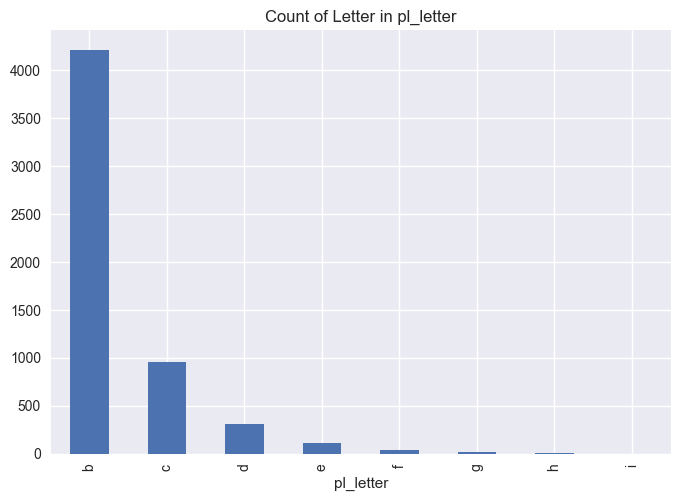

In [450]:
df_filtered_3['pl_letter'].value_counts().plot.bar(title='Count of Letter in pl_letter')
df_filtered_3['pl_letter'].value_counts()

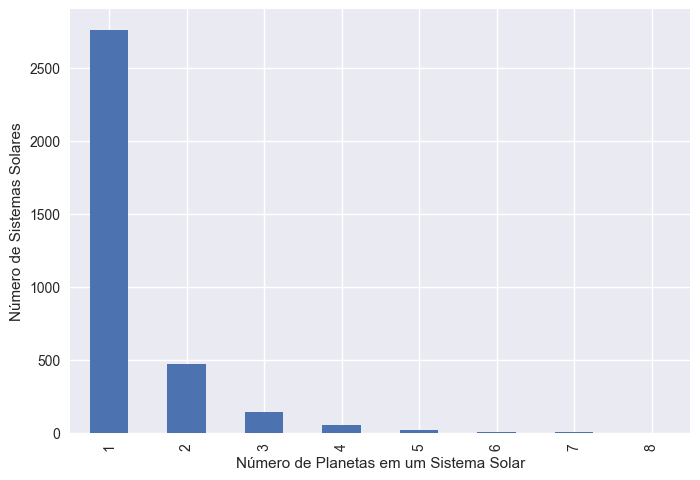

,rowid,pl_name,hostname,pl_letter,hd_name,hip_name,tic_id,gaia_id,default_flag,star_number,sy_pnum,circumbinary_flag,discoverymethod,disc_year,disc_locale,discovery_facility,discovery_telescope,discovery_instrument,soltype,pl_orbper,pl_orbsmax,pl_rade,pl_radj,pl_masse,pl_massj,pl_msinie,pl_msinij,pl_cmasse,pl_cmassj,pl_bmasse,pl_bmassj,pl_bmassprov,pl_dens,pl_orbeccen,pl_insol,pl_eqt,pl_orbincl,pl_tranmid,pl_tsystemref,ttv_flag,pl_imppar,pl_trandep,pl_trandur,pl_ratdor,pl_ratror,pl_occdep,pl_orbtper,pl_orblper,pl_rvamp,pl_projobliq,pl_trueobliq,st_spectype,st_teff,st_rad,st_mass,st_met,st_metratio,st_lum,st_logg,st_age,st_dens,st_vsin,st_vsinlim,st_rotp,st_radv,rastr,ra,decstr,dec,glat,glon,elat,elon,sy_pm,sy_pmra,sy_pmdec,sy_dist,sy_plx,sy_bmag,sy_vmag,sy_jmag,sy_hmag,sy_kmag,sy_umag,sy_gmag,sy_rmag,sy_imag,sy_zmag,sy_w1mag,sy_w2mag,sy_w3mag,sy_w4mag,sy_gaiamag,sy_icmag,sy_tmag,sy_kepmag,rowupdate,pl_pubdate,releasedate,pl_nnotes,st_nphot,st_nrvc,st_nspec,pl_nespec,pl_ntranspec
2852,2853,HD 219134 h,HD 219134,7,HD 219134,HIP 114622,TIC 283722336,Gaia DR2 2009481748875806976,1,1,6,0,Radial Velocity,2015,Ground,Roque de los Muchachos Observatory,Other,Others,Published Confirmed,2247.000000,3.110000,NaN,NaN,NaN,NaN,108.06220,0.3400,NaN,NaN,108.06220,0.34000,Msini,NaN,0.0600,NaN,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,2448725.000,215.00,6.10,NaN,NaN,K3 V,4913.0,0.77,0.79,0.08,[Fe/H],-0.509,4.51,12.46,NaN,NaN,NaN,NaN,NaN,23h13m20.93s,348.337203,+57d10m10.65s,57.169626,-3.20073,109.90724,54.54155,23.75174,2095.380747,2074.52000,294.9360,6.53127,153.0810,6.585,5.56911,3.981,3.469,3.261,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.24020,NaN,4.6278,NaN,2015-11-18,2015-11,2015-11-19,3,1,4,5,0,0
5920,5921,KMT-2021-BLG-1253L b,KMT-2021-BLG-1253L,1,NaN,NaN,NaN,NaN,1,1,1,0,Microlensing,2022,Ground,KMTNet,1.6 m wide-field telescope,18k Mosaic CCD camera,Published Confirmed,NaN,1.520000,NaN,NaN,19.05000,0.05994,NaN,NaN,NaN,NaN,19.05000,0.05994,Mass,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.24,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,17h50m28.13s,267.617208,-29d16m45.41s,-29.279281,-1.08408,0.25345,-5.85728,267.90698,NaN,NaN,NaN,6640.00000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2023-02-17,2022-11,2023-02-17,5,0,0,0,0,0
5925,5926,KMT-2021-BLG-1303L b,KMT-2021-BLG-1303L,1,NaN,NaN,NaN,NaN,1,1,1,0,Microlensing,2022,Ground,KMTNet,1.6 m wide-field telescope,18k Mosaic CCD camera,Published Confirmed,NaN,2.890000,NaN,NaN,120.77479,0.38000,NaN,NaN,NaN,NaN,120.77479,0.38000,Mass,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.57,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,18h07m27.33s,271.863875,-29d16m53.69s,-29.281581,-4.29901,2.09502,-5.85287,271.63031,NaN,NaN,NaN,6280.00000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2022-10-31,2022-08,2022-10-31,0,0,0,0,0,0
5927,5928,KMT-2021-BLG-1372L b,KMT-2021-BLG-1372L,1,NaN,NaN,NaN,NaN,1,1,1,0,Microlensing,2022,Ground,KMTNet,1.6 m wide-field telescope,18k Mosaic CCD camera,Published Confirmed,NaN,2.370000,NaN,NaN,61.27000,0.19278,NaN,NaN,NaN,NaN,61.27000,0.19278,Mass,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.42,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,17h37m57.25s,264.488542,-28d08m54.20s,-28.148389,1.84567,359.78034,-4.80233,265.12104,NaN,NaN,NaN,5970.00000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2023-02-17,2022-11,2023-02-17,3,0,0,0,0,0
5933,5934,KMT-2021-BLG-1391L b,KMT-2021-BLG-1391L,1,NaN,NaN,NaN,NaN,1,1,1,0,Microlensing,2022,Ground,KMTNet,1.6 m wide-field telescope,18k Mosaic CCD camera,Published Confirmed,NaN,2.290000,NaN,NaN,4.55000,0.01432,NaN,NaN,NaN,NaN,4.55000,0.01432,Mass,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.37,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,18h02m44.06s,270.683583,-28d03m37.80s,-28.060500,-2.80007,2.65873,-4.62265,

In [451]:
import pandas as pd
import matplotlib.pyplot as plt

# Create a new DataFrame df_astros from df_filtered_3
df_astros = df_filtered_3.copy()

# Define the letters in reverse order
letters = ['i', 'h', 'g', 'f', 'e', 'd', 'c', 'b']

# Define the number of rows to remove for each letter
remove_counts = {
    'i': 1,
    'h': 5,
    'g': 14,
    'f': 38,
    'e': 114,
    'd': 315,
    'c': 957,
    'b': 4205
}

# Iterate through the letters in reverse order
for letter in letters:
    # Identify the rows where pl_letter is the current letter
    letter_indices = df_astros[df_astros['pl_letter'] == letter].index
    
    # Remove the required number of rows for each preceding letter
    for preceding_letter in letters[letters.index(letter) + 1:]:
        preceding_indices = df_astros[df_astros['pl_letter'] == preceding_letter].index
        if not preceding_indices.empty:
            df_astros = df_astros.drop(preceding_indices[:remove_counts[letter]])

# Define the mapping from letters to numbers
letter_to_number = {
    'i': '8',
    'h': '7',
    'g': '6',
    'f': '5',
    'e': '4',
    'd': '3',
    'c': '2',
    'b': '1'
}

# Transform the letters to numbers
df_astros['pl_letter'] = df_astros['pl_letter'].replace(letter_to_number)

# Plot the updated value counts
df_astros['pl_letter'].value_counts().plot.bar()
plt.xlabel('Número de Planetas em um Sistema Solar')
plt.ylabel('Número de Sistemas Solares')
plt.show()

df_astros

### 3.6 Confirmed vs ?

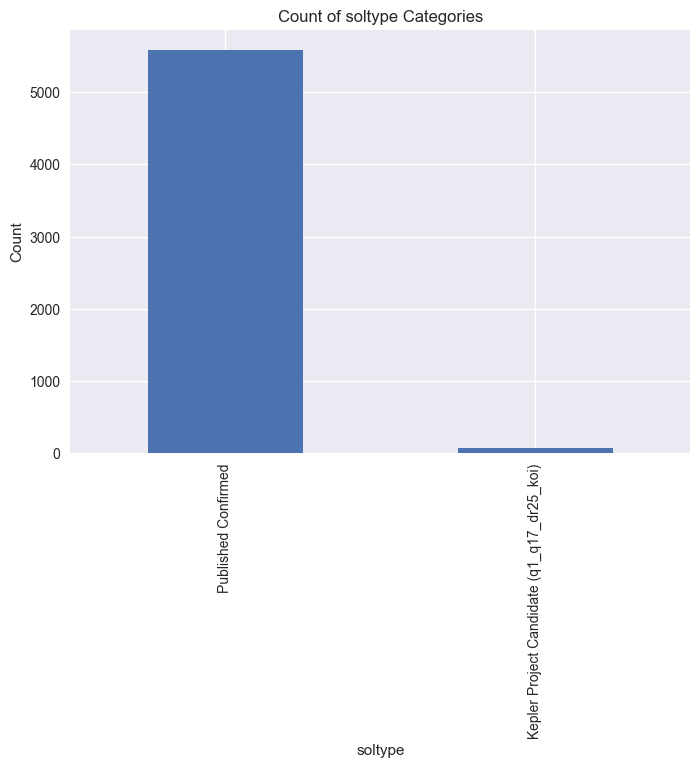

In [452]:
import matplotlib.pyplot as plt



# Count the occurrences of each soltype
soltype_counts = df_filtered_3['soltype'].value_counts()

# Plot the results
soltype_counts.plot.bar(title='Count of soltype Categories')
plt.xlabel('soltype')
plt.ylabel('Count')
plt.show()

### 3.7 Discovery Techniques

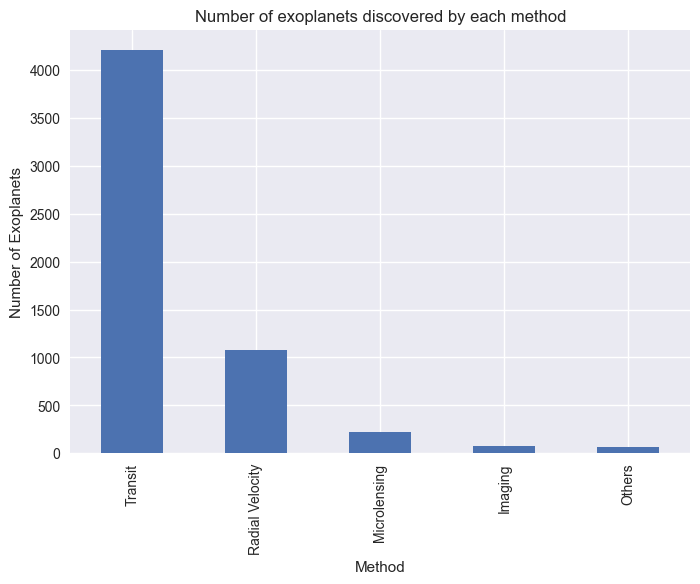

,rowid,pl_name,hostname,pl_letter,hd_name,hip_name,tic_id,gaia_id,default_flag,star_number,sy_pnum,circumbinary_flag,discoverymethod,disc_year,disc_locale,discovery_facility,discovery_telescope,discovery_instrument,soltype,pl_orbper,pl_orbsmax,pl_rade,pl_radj,pl_masse,pl_massj,pl_msinie,pl_msinij,pl_cmasse,pl_cmassj,pl_bmasse,pl_bmassj,pl_bmassprov,pl_dens,pl_orbeccen,pl_insol,pl_eqt,pl_orbincl,pl_tranmid,pl_tsystemref,ttv_flag,pl_imppar,pl_trandep,pl_trandur,pl_ratdor,pl_ratror,pl_occdep,pl_orbtper,pl_orblper,pl_rvamp,pl_projobliq,pl_trueobliq,st_spectype,st_teff,st_rad,st_mass,st_met,st_metratio,st_lum,st_logg,st_age,st_dens,st_vsin,st_vsinlim,st_rotp,st_radv,rastr,ra,decstr,dec,glat,glon,elat,elon,sy_pm,sy_pmra,sy_pmdec,sy_dist,sy_plx,sy_bmag,sy_vmag,sy_jmag,sy_hmag,sy_kmag,sy_umag,sy_gmag,sy_rmag,sy_imag,sy_zmag,sy_w1mag,sy_w2mag,sy_w3mag,sy_w4mag,sy_gaiamag,sy_icmag,sy_tmag,sy_kepmag,rowupdate,pl_pubdate,releasedate,pl_nnotes,st_nphot,st_nrvc,st_nspec,pl_nespec,pl_ntranspec
2,3,11 Com b,11 Com,b,HD 107383,HIP 60202,TIC 72437047,Gaia DR2 3946945413106333696,1,2,1,0,Radial Velocity,2007,Ground,Xinglong Station,Other,Others,Published Confirmed,323.210000,1.178000,NaN,NaN,NaN,NaN,4914.89849,15.4640,NaN,NaN,4914.89849,15.4640,Msini,NaN,0.2380,NaN,NaN,NaN,NaN,JD,0,NaN,NaN,NaN,NaN,NaN,NaN,2454519.400,91.330,288.630,NaN,NaN,G8 III,4874.0,13.76,2.09,-0.26,[Fe/H],1.978,2.45,NaN,NaN,NaN,NaN,NaN,NaN,12h20m42.91s,185.178779,+17d47m35.71s,17.793252,78.28058,264.13775,18.33392,177.41790,140.383627,-109.24100,88.1701,93.1846,10.71040,5.726,4.72307,2.943,2.484,2.282,NaN,NaN,NaN,NaN,NaN,0.639,0.732,2.358,2.270,4.44038,NaN,3.83790,NaN,2023-09-19,2023-08,2023-09-19,2,1,2,0,0,0
3,4,11 UMi b,11 UMi,b,HD 136726,HIP 74793,TIC 230061010,Gaia DR2 1696798367260229376,1,1,1,0,Radial Velocity,2009,Ground,Thueringer Landessternwarte Tautenburg,Other,Others,Published Confirmed,516.219970,1.530000,NaN,NaN,NaN,NaN,4684.81420,14.7400,NaN,NaN,4684.81420,14.7400,Msini,NaN,0.0800,NaN,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,189.700,NaN,NaN,NaN,4213.0,29.79,2.78,-0.02,[Fe/H],NaN,1.93,NaN,NaN,NaN,NaN,NaN,NaN,15h17m05.90s,229.274595,+71d49m26.19s,71.823943,41.04437,108.71900,74.95821,141.64699,10.679019,3.42996,10.1132,125.3210,7.95388,6.382,5.01300,2.876,2.091,1.939,NaN,NaN,NaN,NaN,NaN,-0.290,0.143,1.894,1.787,4.56216,NaN,3.82294,NaN,2018-09-04,2017-03,2018-09-06,0,1,1,0,0,0
6,7,14 And b,14 And,b,HD 221345,HIP 116076,TIC 333225860,Gaia DR2 1920113512486282240,1,1,1,0,Radial Velocity,2008,Ground,Okayama Astrophysical Observatory,Other,Others,Published Confirmed,186.760000,0.775000,NaN,NaN,NaN,NaN,1131.15130,3.5590,NaN,NaN,1131.15130,3.5590,Msini,NaN,0.0000,NaN,NaN,NaN,NaN,JD,0,NaN,NaN,NaN,NaN,NaN,NaN,2452853.000,0.000,86.080,NaN,NaN,K0 III,4888.0,11.55,1.78,-0.21,[Fe/H],1.840,2.55,NaN,NaN,NaN,NaN,NaN,NaN,23h31m17.80s,352.824150,+39d14m09.01s,39.235837,-21.05141,106.41269,38.22901,11.95935,299.252618,287.29200,-83.7582,75.4392,13.22890,6.256,5.23133,3.019,2.608,2.331,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.91781,NaN,4.32140,NaN,2023-09-19,2023-08,2023-09-19,0,1,1,0,0,0
11,12,14 Her b,14 Her,b,HD 145675,HIP 79248,TIC 219483057,Gaia DR2 1385293808145621504,1,1,2,0,Radial Velocity,2002,Ground,W. M. Keck Observatory,10 m Keck I Telescope,HIRES Spectrometer,Published Confirmed,1765.038900,2.774000,NaN,NaN,2559.47216,8.053,NaN,NaN,NaN,NaN,2559.47216,8.0530,Mass,NaN,0.3730,NaN,NaN,144.652,NaN,BJD,0,NaN,NaN,NaN,NaN,NaN,NaN,2449614.563,23.043,89.582,NaN,NaN,NaN,NaN,NaN,0.91,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,16h10m24.50s,242.602101,+43d48m58.90s,43.816362,46.94447,69.16849,62.87885,223.24717,324.530306,132.01900,-296.4640,17.9323,55.73630,7.495,6.61935,5.158,4.803,4.714,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.38300,NaN,5.86310,NaN,2023-06-12,2022-09,2023-06-12,0,1,4,1,0,0
22,23,16 Cyg B b,16 Cyg B,b,HD 186427,HIP 96901,TIC 27533327,Gaia DR2 2135550755683407232,1,3,1,0,Radial Velocity,1996,Ground,Multiple Observatories,Multiple Telescopes,Multiple Instruments,Pu

In [453]:

# Start with the original DataFrame each time
df_methods = df_filtered_3.copy()

# Calculate value counts
value_counts = df_methods['discoverymethod'].value_counts()

# Identify values with counts less than the threshold
threshold = 40  # Change this value to 50 or any other value as needed
to_replace = value_counts[value_counts < threshold].index

# Replace these values with "Others"
df_methods['discoverymethod'] = df_methods['discoverymethod'].replace(to_replace, 'Others')

# Plot the updated value counts
df_methods['discoverymethod'].value_counts().plot.bar(title='Number of exoplanets discovered by each method')
plt.xlabel('Method')
plt.ylabel('Number of Exoplanets')
plt.show()

df_filtered_3

### 3.8 Recently Confirmed
use these to check the efficiency of the ML model
download an updated version of the database, compare the data that has the same planet name, and used to be candidate and now it is confirmed. those are cool to observe

## 4 - IGNORE SECTION 4 - Machine Learning Models

### 4.1 - Import the ML libraries

In [454]:
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report



In [455]:
df_filtered_3

,rowid,pl_name,hostname,pl_letter,hd_name,hip_name,tic_id,gaia_id,default_flag,star_number,sy_pnum,circumbinary_flag,discoverymethod,disc_year,disc_locale,discovery_facility,discovery_telescope,discovery_instrument,soltype,pl_orbper,pl_orbsmax,pl_rade,pl_radj,pl_masse,pl_massj,pl_msinie,pl_msinij,pl_cmasse,pl_cmassj,pl_bmasse,pl_bmassj,pl_bmassprov,pl_dens,pl_orbeccen,pl_insol,pl_eqt,pl_orbincl,pl_tranmid,pl_tsystemref,ttv_flag,pl_imppar,pl_trandep,pl_trandur,pl_ratdor,pl_ratror,pl_occdep,pl_orbtper,pl_orblper,pl_rvamp,pl_projobliq,pl_trueobliq,st_spectype,st_teff,st_rad,st_mass,st_met,st_metratio,st_lum,st_logg,st_age,st_dens,st_vsin,st_vsinlim,st_rotp,st_radv,rastr,ra,decstr,dec,glat,glon,elat,elon,sy_pm,sy_pmra,sy_pmdec,sy_dist,sy_plx,sy_bmag,sy_vmag,sy_jmag,sy_hmag,sy_kmag,sy_umag,sy_gmag,sy_rmag,sy_imag,sy_zmag,sy_w1mag,sy_w2mag,sy_w3mag,sy_w4mag,sy_gaiamag,sy_icmag,sy_tmag,sy_kepmag,rowupdate,pl_pubdate,releasedate,pl_nnotes,st_nphot,st_nrvc,st_nspec,pl_nespec,pl_ntranspec
2,3,11 Com b,11 Com,b,HD 107383,HIP 60202,TIC 72437047,Gaia DR2 3946945413106333696,1,2,1,0,Radial Velocity,2007,Ground,Xinglong Station,Other,Others,Published Confirmed,323.210000,1.178000,NaN,NaN,NaN,NaN,4914.89849,15.4640,NaN,NaN,4914.89849,15.4640,Msini,NaN,0.2380,NaN,NaN,NaN,NaN,JD,0,NaN,NaN,NaN,NaN,NaN,NaN,2454519.400,91.330,288.630,NaN,NaN,G8 III,4874.0,13.76,2.09,-0.26,[Fe/H],1.978,2.45,NaN,NaN,NaN,NaN,NaN,NaN,12h20m42.91s,185.178779,+17d47m35.71s,17.793252,78.28058,264.13775,18.33392,177.41790,140.383627,-109.24100,88.1701,93.1846,10.71040,5.726,4.72307,2.943,2.484,2.282,NaN,NaN,NaN,NaN,NaN,0.639,0.732,2.358,2.270,4.44038,NaN,3.83790,NaN,2023-09-19,2023-08,2023-09-19,2,1,2,0,0,0
3,4,11 UMi b,11 UMi,b,HD 136726,HIP 74793,TIC 230061010,Gaia DR2 1696798367260229376,1,1,1,0,Radial Velocity,2009,Ground,Thueringer Landessternwarte Tautenburg,Other,Others,Published Confirmed,516.219970,1.530000,NaN,NaN,NaN,NaN,4684.81420,14.7400,NaN,NaN,4684.81420,14.7400,Msini,NaN,0.0800,NaN,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,189.700,NaN,NaN,NaN,4213.0,29.79,2.78,-0.02,[Fe/H],NaN,1.93,NaN,NaN,NaN,NaN,NaN,NaN,15h17m05.90s,229.274595,+71d49m26.19s,71.823943,41.04437,108.71900,74.95821,141.64699,10.679019,3.42996,10.1132,125.3210,7.95388,6.382,5.01300,2.876,2.091,1.939,NaN,NaN,NaN,NaN,NaN,-0.290,0.143,1.894,1.787,4.56216,NaN,3.82294,NaN,2018-09-04,2017-03,2018-09-06,0,1,1,0,0,0
6,7,14 And b,14 And,b,HD 221345,HIP 116076,TIC 333225860,Gaia DR2 1920113512486282240,1,1,1,0,Radial Velocity,2008,Ground,Okayama Astrophysical Observatory,Other,Others,Published Confirmed,186.760000,0.775000,NaN,NaN,NaN,NaN,1131.15130,3.5590,NaN,NaN,1131.15130,3.5590,Msini,NaN,0.0000,NaN,NaN,NaN,NaN,JD,0,NaN,NaN,NaN,NaN,NaN,NaN,2452853.000,0.000,86.080,NaN,NaN,K0 III,4888.0,11.55,1.78,-0.21,[Fe/H],1.840,2.55,NaN,NaN,NaN,NaN,NaN,NaN,23h31m17.80s,352.824150,+39d14m09.01s,39.235837,-21.05141,106.41269,38.22901,11.95935,299.252618,287.29200,-83.7582,75.4392,13.22890,6.256,5.23133,3.019,2.608,2.331,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.91781,NaN,4.32140,NaN,2023-09-19,2023-08,2023-09-19,0,1,1,0,0,0
11,12,14 Her b,14 Her,b,HD 145675,HIP 79248,TIC 219483057,Gaia DR2 1385293808145621504,1,1,2,0,Radial Velocity,2002,Ground,W. M. Keck Observatory,10 m Keck I Telescope,HIRES Spectrometer,Published Confirmed,1765.038900,2.774000,NaN,NaN,2559.47216,8.053,NaN,NaN,NaN,NaN,2559.47216,8.0530,Mass,NaN,0.3730,NaN,NaN,144.652,NaN,BJD,0,NaN,NaN,NaN,NaN,NaN,NaN,2449614.563,23.043,89.582,NaN,NaN,NaN,NaN,NaN,0.91,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,16h10m24.50s,242.602101,+43d48m58.90s,43.816362,46.94447,69.16849,62.87885,223.24717,324.530306,132.01900,-296.4640,17.9323,55.73630,7.495,6.61935,5.158,4.803,4.714,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.38300,NaN,5.86310,NaN,2023-06-12,2022-09,2023-06-12,0,1,4,1,0,0
22,23,16 Cyg B b,16 Cyg B,b,HD 186427,HIP 96901,TIC 27533327,Gaia DR2 2135550755683407232,1,3,1,0,Radial Velocity,1996,Ground,Multiple Observatories,Multiple Telescopes,Multiple Instruments,Pu

### Random Forest Classifier

In [456]:


# Step 3: Filter the dataset
df_confirmed = df_filtered_3[df_filtered_3['soltype'] == 'Published Confirmed']
df_other = df_filtered_3[df_filtered_3['soltype'] != 'Published Confirmed']

# Step 4: Prepare the data
# Assuming 'columns_to_use' is a list of column names you want to use for the model
#pl_orbincl, pl_orbeccen, pl_eqt, pl_bmasse
columns_to_use = ['pl_orbper', 'pl_orbsmax', 'st_mass']
df_other = df_other[columns_to_use ]
df_confirmed = df_confirmed[columns_to_use]
df_ml = df_filtered_3[columns_to_use + ['soltype']].dropna()
df_ml

,pl_orbper,pl_orbsmax,st_mass,soltype
2,323.210000,1.178000,2.09,Published Confirmed
3,516.219970,1.530000,2.78,Published Confirmed
6,186.760000,0.775000,1.78,Published Confirmed
11,1765.038900,2.774000,0.91,Published Confirmed
22,798.500000,1.660000,1.08,Published Confirmed
...,...,...,...,...
36073,4.617033,0.059222,1.30,Published Confirmed
36080,241.258000,0.827774,1.30,Published Confirmed
36085,1276.460000,2.513290,1.30,Published Confirmed
36088,385.200000,1.180000,1.48,Published Confirmed


In [457]:

X = df_ml[columns_to_use]
y = df_ml['soltype'].apply(lambda x: 1 if x == 'Published Confirmed' else 0)

# Step 5: Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 6: Train the model
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)

# Step 7: Evaluate the model
y_pred = model.predict(X_test)
print(classification_report(y_test, y_pred))

# Step 8: Add predictions to the test DataFrame
X_test['actual_soltype'] = y_test
X_test['predicted_soltype'] = y_pred
X_test['is_exoplanet'] = X_test['predicted_soltype'].apply(lambda x: 'Exoplanet' if x == 1 else 'Not Exoplanet')

# Return the DataFrame with predictions
X_test_with_predictions = X_test.copy()
X_test_with_predictions
# Export the DataFrame to a CSV file
X_test_with_predictions.to_csv('X_test_with_predictions.csv', index=False)


              precision    recall  f1-score   support

           0       0.00      0.00      0.00        15
           1       0.97      1.00      0.98       483

    accuracy                           0.97       498
   macro avg       0.48      0.50      0.49       498
weighted avg       0.94      0.97      0.96       498



c:\Users\Usuario\Desktop\tcc\exoplanets-classifier\.conda\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\Usuario\Desktop\tcc\exoplanets-classifier\.conda\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\Usuario\Desktop\tcc\exoplanets-classifier\.conda\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(av

## 5 - IGNORE SECTION 5 -TESS

### 5.1 Data Cleaning

In [458]:

# Substitua 'caminho_para_seu_arquivo.csv' pelo caminho do seu arquivo CSV
file = 'tess_candidates.csv'
df_tess = pd.read_csv(file)

df_tess.head()

,rowid,toi,toipfx,tid,ctoi_alias,pl_pnum,tfopwg_disp,rastr,ra,raerr1,raerr2,decstr,dec,decerr1,decerr2,st_pmra,st_pmraerr1,st_pmraerr2,st_pmralim,st_pmrasymerr,st_pmdec,st_pmdecerr1,st_pmdecerr2,st_pmdeclim,st_pmdecsymerr,pl_tranmid,pl_tranmiderr1,pl_tranmiderr2,pl_tranmidlim,pl_tranmidsymerr,pl_orbper,pl_orbpererr1,pl_orbpererr2,pl_orbperlim,pl_orbpersymerr,pl_trandurh,pl_trandurherr1,pl_trandurherr2,pl_trandurhlim,pl_trandurhsymerr,pl_trandep,pl_trandeperr1,pl_trandeperr2,pl_trandeplim,pl_trandepsymerr,pl_rade,pl_radeerr1,pl_radeerr2,pl_radelim,pl_radesymerr,pl_insol,pl_insolerr1,pl_insolerr2,pl_insollim,pl_insolsymerr,pl_eqt,pl_eqterr1,pl_eqterr2,pl_eqtlim,pl_eqtsymerr,st_tmag,st_tmagerr1,st_tmagerr2,st_tmaglim,st_tmagsymerr,st_dist,st_disterr1,st_disterr2,st_distlim,st_distsymerr,st_teff,st_tefferr1,st_tefferr2,st_tefflim,st_teffsymerr,st_logg,st_loggerr1,st_loggerr2,st_logglim,st_loggsymerr,st_rad,st_raderr1,st_raderr2,st_radlim,st_radsymerr,toi_created,rowupdate
0,1,1000.01,1000,50365310,5.036531e+07,1,FP,07h29m25.85s,112.357708,NaN,NaN,-12d41m45.46s,-12.695960,NaN,NaN,-5.964,0.085,-0.085,0.0,1.0,-0.076,0.072,-0.072,0.0,1.0,2.459230e+06,0.001657,-0.001657,0,1,2.171348,0.000264,-0.000264,0,1,2.01722,0.319588,-0.319588,0,1,656.886099,37.778210,-37.778210,0,1,5.818163,1.910546,-1.910546,0,1,22601.948581,NaN,NaN,NaN,NaN,3127.204052,NaN,NaN,NaN,NaN,9.604000,0.013,-0.013,0,1,485.735,11.9515,-11.9515,0,1,10249.0,264.7,-264.7,0,1,4.19,0.07,-0.07,0,1,2.16986,0.072573,-0.072573,0,1,2019-07-24 15:58:33,2021-10-29 12:59:15
1,2,1001.01,1001,88863718,8.886372e+07,1,PC,08h10m19.31s,122.580465,NaN,NaN,-05d30m49.87s,-5.513852,NaN,NaN,-4.956,0.102,-0.102,0.0,1.0,-15.555,0.072,-0.072,0.0,1.0,2.459988e+06,0.001916,-0.001916,0,1,1.931646,0.000005,-0.000005,0,1,3.16600,0.647000,-0.647000,0,1,1286.000000,1186.490000,-1186.490000,0,1,11.215400,2.624200,-2.624200,0,1,44464.500000,NaN,NaN,NaN,NaN,4045.000000,NaN,NaN,NaN,NaN,9.423440,0.006,-0.006,0,1,295.862,5.9100,-5.9100,0,1,7070.0,126.4,-126.4,0,1,4.03,0.09,-0.09,0,1,2.01000,0.090000,-0.090000,0,1,2019-07-24 15:58:33,2023-04-03 14:31:04
2,3,1002.01,1002,124709665,1.247097e+08,1,FP,06h58m54.47s,104.726966,NaN,NaN,-10d34m49.64s,-10.580455,NaN,NaN,-1.462,0.206,-0.206,0.0,1.0,-2.249,0.206,-0.206,0.0,1.0,2.459225e+06,0.000625,-0.000625,0,1,1.867557,0.000003,-0.000003,0,1,1.40800,0.184000,-0.184000,0,1,1500.000000,1.758400,-1.758400,0,1,23.752900,NaN,NaN,0,1,2860.610000,NaN,NaN,NaN,NaN,2037.000000,NaN,NaN,NaN,NaN,9.299501,0.058,-0.058,0,1,943.109,106.3330,-106.3330,0,1,8924.0,124.0,-124.0,0,1,NaN,NaN,NaN,0,1,5.73000,NaN,NaN,0,1,2019-07-24 15:58:33,2022-07-11 16:02:02
3,4,1003.01,1003,106997505,1.069975e+08,1,FP,07h22m14.39s,110.559945,NaN,NaN,-25d12m25.26s,-25.207017,NaN,NaN,-0.939,0.041,-0.041,0.0,1.0,1.640,0.055,-0.055,0.0,1.0,2.458493e+06,0.005350,-0.005350,0,1,2.743230,0.001080,-0.001080,0,1,3.16700,0.642000,-0.642000,0,1,383.410000,0.781988,-0.781988,0,1,NaN,NaN,NaN,0,1,1177.360000,NaN,NaN,NaN,NaN,1631.000000,NaN,NaN,NaN,NaN,9.300300,0.037,-0.037,0,1,7728.170,1899.5700,-1899.5700,0,1,5388.5,567.0,-567.0,0,1,4.15,1.64,-1.64,0,1,NaN,NaN,NaN,0,1,2019-07-24 15:58:33,2022-02-23 10:10:02
4,5,1004.01,1004,238597883,2.385979e+08,1,FP,08h08m42.77s,122.178195,NaN,NaN,-48d48m10.12s,-48.802811,NaN,NaN,-4.496,0.069,-0.069,0.0,1.0,9.347,0.062,-0.062,0.0,1.0,2.459987e+06,0.003748,-0.003748,0,1,3.573014,0.000013,-0.000013,0,1,3.37000,1.029000,-1.029000,0,1,755.000000,1306.550000,-1306.550000,0,1,11.311300,3.247140,-3.247140,0,1,54679.300000,NaN,NaN,NaN,NaN,4260.000000,NaN,NaN,NaN,NaN,9.135500,0.006,-0.006,0,1,356.437,4.6175,-4.6175,0,1,9219.0,171.1,-171.1,0,1,4.14,0.07,-0.07,0,1,2.15000,0.060000,-0.060000,0,1,2019-07-24 15:58:33,2023-03-08 16:02:02


In [459]:
# List of columns from the DataFrame
columns = [
    "toi", "toipfx", "tid", "ctoi_alias", "pl_pnum", "tfopwg_disp", "rastr", "ra", "raerr1", "raerr2", 
    "decstr", "dec", "decerr1", "decerr2", "st_pmra", "st_pmraerr1", "st_pmraerr2", "st_pmralim", 
    "st_pmrasymerr", "st_pmdec", "st_pmdecerr1", "st_pmdecerr2", "st_pmdeclim", "st_pmdecsymerr", 
    "pl_tranmid", "pl_tranmiderr1", "pl_tranmiderr2", "pl_tranmidlim", "pl_tranmidsymerr", "pl_orbper", 
    "pl_orbpererr1", "pl_orbpererr2", "pl_orbperlim", "pl_orbpersymerr", "pl_trandurh", "pl_trandurherr1", 
    "pl_trandurherr2", "pl_trandurhlim", "pl_trandurhsymerr", "pl_trandep", "pl_trandeperr1", "pl_trandeperr2", 
    "pl_trandeplim", "pl_trandepsymerr", "pl_rade", "pl_radeerr1", "pl_radeerr2", "pl_radelim", "pl_radesymerr", 
    "pl_insol", "pl_insolerr1", "pl_insolerr2", "pl_insollim", "pl_insolsymerr", "pl_eqt", "pl_eqterr1", 
    "pl_eqterr2", "pl_eqtlim", "pl_eqtsymerr", "st_tmag", "st_tmagerr1", "st_tmagerr2", "st_tmaglim", 
    "st_tmagsymerr", "st_dist", "st_disterr1", "st_disterr2", "st_distlim", "st_distsymerr", "st_teff", 
    "st_tefferr1", "st_tefferr2", "st_tefflim", "st_teffsymerr", "st_logg", "st_loggerr1", "st_loggerr2", 
    "st_logglim", "st_loggsymerr", "st_rad", "st_raderr1", "st_raderr2", "st_radlim", "st_radsymerr", 
    "toi_created"
]

# Filter columns that end with 'err', 'err1', 'err2', or 'lim'
filtered_columns = [col for col in columns if col.endswith(('err', 'err1', 'err2', 'lim'))]

print(filtered_columns)

['raerr1', 'raerr2', 'decerr1', 'decerr2', 'st_pmraerr1', 'st_pmraerr2', 'st_pmralim', 'st_pmrasymerr', 'st_pmdecerr1', 'st_pmdecerr2', 'st_pmdeclim', 'st_pmdecsymerr', 'pl_tranmiderr1', 'pl_tranmiderr2', 'pl_tranmidlim', 'pl_tranmidsymerr', 'pl_orbpererr1', 'pl_orbpererr2', 'pl_orbperlim', 'pl_orbpersymerr', 'pl_trandurherr1', 'pl_trandurherr2', 'pl_trandurhlim', 'pl_trandurhsymerr', 'pl_trandeperr1', 'pl_trandeperr2', 'pl_trandeplim', 'pl_trandepsymerr', 'pl_radeerr1', 'pl_radeerr2', 'pl_radelim', 'pl_radesymerr', 'pl_insolerr1', 'pl_insolerr2', 'pl_insollim', 'pl_insolsymerr', 'pl_eqterr1', 'pl_eqterr2', 'pl_eqtlim', 'pl_eqtsymerr', 'st_tmagerr1', 'st_tmagerr2', 'st_tmaglim', 'st_tmagsymerr', 'st_disterr1', 'st_disterr2', 'st_distlim', 'st_distsymerr', 'st_tefferr1', 'st_tefferr2', 'st_tefflim', 'st_teffsymerr', 'st_loggerr1', 'st_loggerr2', 'st_logglim', 'st_loggsymerr', 'st_raderr1', 'st_raderr2', 'st_radlim', 'st_radsymerr']


In [460]:
df_filter_tess = df_tess
# Filter the DataFrame to keep rows where pl_orbperlim is 0 or NaN
#df_filtered_2 = df_filtered_1[df_filtered_1['pl_orbperlim'].isin([0]) | df_filtered_1['pl_orbperlim'].isna()]
#df_filtered_3 = df_filtered_2[df_filtered_2['pl_orbsmaxlim'].isin([0]) | df_filtered_2['pl_orbsmaxlim'].isna()]
#df_filtered_4 = df_filtered_3[df_filtered_3['pl_radelim'].isin([0]) | df_filtered_3['pl_radelim'].isna()]
#df_filtered_5 = df_filtered_4[df_filtered_4['pl_radjlim'].isin([0]) | df_filtered_4['pl_radjlim'].isna()]
#df_filtered_6 = df_filtered_5[df_filtered_5['pl_msinielim'].isin([0]) | df_filtered_5['pl_msinielim'].isna()]
#df_filtered_7 = df_filtered_6[df_filtered_6['pl_msinijlim'].isin([0]) | df_filtered_6['pl_msinijlim'].isna()]

columns_to_drop = ['raerr1', 'raerr2', 'decerr1', 'decerr2', 'st_pmraerr1', 'st_pmraerr2', 'st_pmralim', 
                   'st_pmrasymerr', 'st_pmdecerr1', 'st_pmdecerr2', 'st_pmdeclim', 'st_pmdecsymerr', 
                   'pl_tranmiderr1', 'pl_tranmiderr2', 'pl_tranmidlim', 'pl_tranmidsymerr', 'pl_orbpererr1', 
                   'pl_orbpererr2', 'pl_orbperlim', 'pl_orbpersymerr', 'pl_trandurherr1', 'pl_trandurherr2',
                     'pl_trandurhlim', 'pl_trandurhsymerr', 'pl_trandeperr1', 'pl_trandeperr2', 'pl_trandeplim', 
                     'pl_trandepsymerr', 'pl_radeerr1', 'pl_radeerr2', 'pl_radelim', 'pl_radesymerr', 'pl_insolerr1', 
                     'pl_insolerr2', 'pl_insollim', 'pl_insolsymerr', 'pl_eqterr1', 'pl_eqterr2', 'pl_eqtlim',
                     'pl_eqtsymerr', 'st_tmagerr1', 'st_tmagerr2', 'st_tmaglim', 'st_tmagsymerr', 'st_disterr1',
                     'st_disterr2', 'st_distlim', 'st_distsymerr', 'st_tefferr1', 'st_tefferr2', 'st_tefflim',
                     'st_teffsymerr', 'st_loggerr1', 'st_loggerr2', 
                   'st_logglim', 'st_loggsymerr', 'st_raderr1', 'st_raderr2', 'st_radlim', 'st_radsymerr'] 
# removed columns that have no information or are not interesting to us
#flags, moons, reference, publication dates
#all exoplanets have zero moons? not true, we just don't have this information
df_filter_tess_2 = df_filter_tess.drop(columns=columns_to_drop)

df_filter_tess_2


,rowid,toi,toipfx,tid,ctoi_alias,pl_pnum,tfopwg_disp,rastr,ra,decstr,dec,st_pmra,st_pmdec,pl_tranmid,pl_orbper,pl_trandurh,pl_trandep,pl_rade,pl_insol,pl_eqt,st_tmag,st_dist,st_teff,st_logg,st_rad,toi_created,rowupdate
0,1,1000.01,1000,50365310,5.036531e+07,1,FP,07h29m25.85s,112.357708,-12d41m45.46s,-12.695960,-5.964,-0.076,2.459230e+06,2.171348,2.017220,656.886099,5.818163,22601.948581,3127.204052,9.604000,485.735,10249.0,4.19,2.169860,2019-07-24 15:58:33,2021-10-29 12:59:15
1,2,1001.01,1001,88863718,8.886372e+07,1,PC,08h10m19.31s,122.580465,-05d30m49.87s,-5.513852,-4.956,-15.555,2.459988e+06,1.931646,3.166000,1286.000000,11.215400,44464.500000,4045.000000,9.423440,295.862,7070.0,4.03,2.010000,2019-07-24 15:58:33,2023-04-03 14:31:04
2,3,1002.01,1002,124709665,1.247097e+08,1,FP,06h58m54.47s,104.726966,-10d34m49.64s,-10.580455,-1.462,-2.249,2.459225e+06,1.867557,1.408000,1500.000000,23.752900,2860.610000,2037.000000,9.299501,943.109,8924.0,NaN,5.730000,2019-07-24 15:58:33,2022-07-11 16:02:02
3,4,1003.01,1003,106997505,1.069975e+08,1,FP,07h22m14.39s,110.559945,-25d12m25.26s,-25.207017,-0.939,1.640,2.458493e+06,2.743230,3.167000,383.410000,NaN,1177.360000,1631.000000,9.300300,7728.170,5388.5,4.15,NaN,2019-07-24 15:58:33,2022-02-23 10:10:02
4,5,1004.01,1004,238597883,2.385979e+08,1,FP,08h08m42.77s,122.178195,-48d48m10.12s,-48.802811,-4.496,9.347,2.459987e+06,3.573014,3.370000,755.000000,11.311300,54679.300000,4260.000000,9.135500,356.437,9219.0,4.14,2.150000,2019-07-24 15:58:33,2023-03-08 16:02:02
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7198,7199,995.01,995,317951248,3.179512e+08,1,FP,07h23m14.75s,110.811443,+05d33m46.26s,5.562850,2.061,-7.082,2.458494e+06,3.443800,2.572000,7260.750000,NaN,1413.670000,1708.000000,10.078100,1080.880,4805.2,NaN,NaN,2019-07-24 15:58:33,2021-10-29 12:59:15
7199,7200,996.01,996,142918609,1.429186e+08,1,FP,07h57m23.99s,119.349948,-19d30m57.65s,-19.516015,-3.900,3.866,2.458495e+06,14.537800,6.826000,4040.000000,16.052300,NaN,NaN,9.792500,379.693,8007.0,NaN,2.050000,2019-07-24 15:58:33,2021-10-29 12:59:15
7200,7201,997.01,997,341729521,3.417295e+08,1,FP,08h05m16.69s,121.319521,-59d34m47.27s,-59.579798,-44.770,-2.616,2.459230e+06,8.413486,3.556833,17479.605331,20.510696,127.916421,857.731431,9.772700,113.667,5786.0,4.52,0.926261,2019-07-24 15:58:33,2021-10-29 12:59:15
7201,7202,998.01,998,54390047,5.439005e+07,1,FP,07h53m16.69s,118.319555,-14d13m07.76s,-14.218823,-1.706,-1.714,2.459230e+06,0.941436,1.360700,339.912662,4.529209,41562.587811,3641.626449,9.695200,482.278,8322.0,4.01,2.349860,2019-07-24 15:58:33,2021-10-29 12:59:15


### 5.2 Confirmed TESS

In [461]:

# Substitua 'caminho_para_seu_arquivo.csv' pelo caminho do seu arquivo CSV
file = 'tess_confirmed.csv'
df_tess_confirmed = pd.read_csv(file)

df_tess_confirmed.head()

,pl_name,hostname,default_flag,sy_snum,sy_pnum,discoverymethod,disc_year,disc_facility,soltype,pl_controv_flag,pl_refname,pl_orbper,pl_orbsmax,pl_rade,pl_radj,pl_bmasse,pl_bmassj,pl_bmassprov,pl_orbeccen,pl_insol,pl_eqt,ttv_flag,st_refname,st_spectype,st_teff,st_rad,st_mass,st_met,st_metratio,st_logg,sy_refname,rastr,ra,decstr,dec,sy_dist,sy_vmag,sy_kmag,sy_gaiamag,rowupdate,pl_pubdate,releasedate
0,AU Mic b,AU Mic,1,1,3,Transit,2020,Transiting Exoplanet Survey Satellite (TESS),Published Confirmed,0,<a refstr=CALE_ET_AL__2021 href=https://ui.ads...,8.462999,0.0645,NaN,NaN,20.12,0.06330,Mass,0.186,NaN,NaN,1,<a refstr=CALE_ET_AL__2021 href=https://ui.ads...,NaN,NaN,NaN,0.50,NaN,NaN,NaN,<a refstr=STASSUN_ET_AL__2019 href=https://ui....,20h45m09.87s,311.291137,-31d20m32.82s,-31.342450,9.7221,8.81,4.529,7.84038,2022-05-09,2021-12,2022-05-09
1,AU Mic c,AU Mic,1,1,3,Transit,2021,Transiting Exoplanet Survey Satellite (TESS),Published Confirmed,0,<a refstr=CALE_ET_AL__2021 href=https://ui.ads...,18.858991,0.1101,NaN,NaN,9.60,0.03020,Mass,NaN,NaN,NaN,0,<a refstr=CALE_ET_AL__2021 href=https://ui.ads...,NaN,NaN,NaN,0.50,NaN,NaN,NaN,<a refstr=STASSUN_ET_AL__2019 href=https://ui....,20h45m09.87s,311.291137,-31d20m32.82s,-31.342450,9.7221,8.81,4.529,7.84038,2022-05-09,2021-12,2022-05-09
2,BD-14 3065 b,BD-14 3065 A,1,3,1,Transit,2024,Transiting Exoplanet Survey Satellite (TESS),Published Confirmed,0,<a refstr=_SCARON_UBJAK_ET_AL__2024 href=https...,4.288973,0.0656,21.590,1.926,3932.00,12.37000,Mass,0.066,NaN,2001.0,0,<a refstr=_SCARON_UBJAK_ET_AL__2024 href=https...,NaN,6935.0,2.35,1.41,-0.34,[Fe/H],3.85,<a refstr=STASSUN_ET_AL__2019 href=https://ui....,10h14m40.72s,153.669669,-15d38m34.21s,-15.642837,589.4230,11.10,9.932,10.91000,2024-06-25,2024-03,2024-06-25
3,DS Tuc A b,DS Tuc A,1,2,1,Transit,2019,Transiting Exoplanet Survey Satellite (TESS),Published Confirmed,0,<a refstr=NEWTON_ET_AL__2019 href=https://ui.a...,8.138268,NaN,5.700,0.509,NaN,NaN,NaN,0.000,NaN,850.0,0,<a refstr=NEWTON_ET_AL__2019 href=https://ui.a...,G6 V,5428.0,0.96,1.01,0.00,NaN,NaN,<a refstr=STASSUN_ET_AL__2019 href=https://ui....,23h39m39.71s,354.915467,-69d11m45.75s,-69.196043,44.0622,8.17,6.676,8.31926,2019-07-03,2019-07,2019-07-11
4,GJ 1252 b,GJ 1252,1,1,1,Transit,2020,Transiting Exoplanet Survey Satellite (TESS),Published Confirmed,0,<a refstr=LUQUE__AMP__PALL_EACUTE__2022 href=h...,0.518233,NaN,1.193,0.106,1.32,0.00415,Mass,0.000,NaN,NaN,0,<a refstr=SHPORER_ET_AL__2020 href=https://ui....,M3,3458.0,0.39,0.38,0.10,[Fe/H],NaN,<a refstr=STASSUN_ET_AL__2019 href=https://ui....,20h27m42.88s,306.928646,-56d27m44.23s,-56.462286,20.3730,12.68,7.915,11.23640,2023-07-10,2022-09,2023-07-10


### 5.3 decision tree

In [462]:
columns = [
    'pl_orbper',      # Planet Orbital Period Value [days]
    'pl_rade',        # Planet Radius Value [R_Earth]
    'pl_insol',       # Planet Insolation Value [Earth flux]
    'pl_eqt',         # Planet Equilibrium Temperature Value [K]
    'st_teff',        # Stellar Effective Temperature Value [K]
    'st_logg',        # Stellar log(g) Value [cm/s**2]
    'st_rad'          # Stellar Radius Value [R_Sun]
]

df_tess_confirmed = df_tess_confirmed[columns].dropna()
df_tess_confirmed
df_filter_tess_3 = df_filter_tess_2[columns].dropna()
df_filter_tess_3


,pl_orbper,pl_rade,pl_insol,pl_eqt,st_teff,st_logg,st_rad
0,2.171348,5.818163,22601.948581,3127.204052,10249.0,4.19000,2.169860
1,1.931646,11.215400,44464.500000,4045.000000,7070.0,4.03000,2.010000
4,3.573014,11.311300,54679.300000,4260.000000,9219.0,4.14000,2.150000
7,6.998921,14.775200,448.744000,1282.000000,6596.0,3.71000,2.700000
10,1.430369,13.250493,1281.241792,1525.905097,5600.0,4.48851,0.890774
...,...,...,...,...,...,...,...
7196,1.463502,4.758690,4081.060000,2226.000000,8035.0,4.28000,1.670000
7197,2.396722,3.838449,15531.063624,2847.213599,10393.0,4.32000,1.877390
7200,8.413486,20.510696,127.916421,857.731431,5786.0,4.52000,0.926261
7201,0.941436,4.529209,41562.587811,3641.626449,8322.0,4.01000,2.349860


In [463]:

# Assuming df_tess_confirmed and df_filter_tess_3 are already defined and preprocessed
# Label the data
df_tess_confirmed['is_exoplanet'] = 1
df_filter_tess_3['is_exoplanet'] = 0

# Combine the data
df_combined = pd.concat([df_tess_confirmed, df_filter_tess_3])

# Separate features and target
X = df_combined.drop(columns=['is_exoplanet'])
y = df_combined['is_exoplanet']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Scale the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Train a RandomForestClassifier
model = RandomForestClassifier(random_state=42)
model.fit(X_train_scaled, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test_scaled)

# Evaluate the model
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# Predict on the candidate exoplanets
X_candidates_scaled = scaler.transform(df_filter_tess_3.drop(columns=['is_exoplanet']))
candidate_predictions = model.predict(X_candidates_scaled)

# Add predictions to the candidate dataframe
df_filter_tess_3['predicted_is_exoplanet'] = candidate_predictions

# Display the first few rows of the candidate dataframe with predictions
print(df_filter_tess_3.head())

Confusion Matrix:
[[1237    2]
 [  43    3]]

Classification Report:
              precision    recall  f1-score   support

           0       0.97      1.00      0.98      1239
           1       0.60      0.07      0.12        46

    accuracy                           0.96      1285
   macro avg       0.78      0.53      0.55      1285
weighted avg       0.95      0.96      0.95      1285

    pl_orbper    pl_rade      pl_insol       pl_eqt  st_teff  st_logg  \
0    2.171348   5.818163  22601.948581  3127.204052  10249.0  4.19000   
1    1.931646  11.215400  44464.500000  4045.000000   7070.0  4.03000   
4    3.573014  11.311300  54679.300000  4260.000000   9219.0  4.14000   
7    6.998921  14.775200    448.744000  1282.000000   6596.0  3.71000   
10   1.430369  13.250493   1281.241792  1525.905097   5600.0  4.48851   

      st_rad  is_exoplanet  predicted_is_exoplanet  
0   2.169860             0                       0  
1   2.010000             0                       0  
4   2.

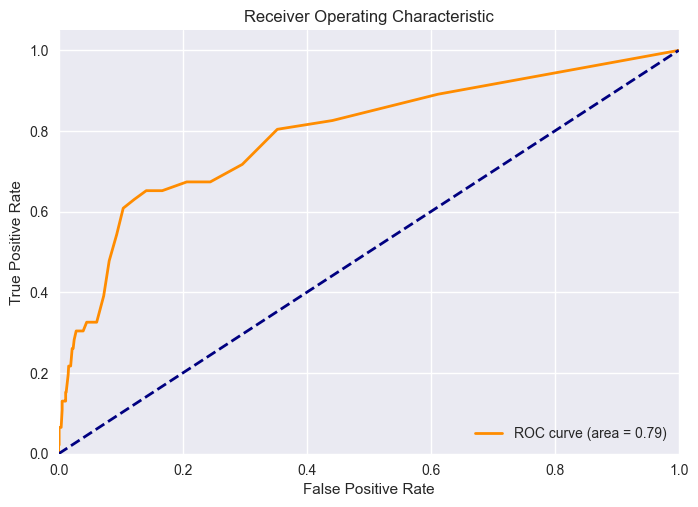

In [464]:

# Plot ROC Curve
y_prob = model.predict_proba(X_test_scaled)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, y_prob)
roc_auc = roc_auc_score(y_test, y_prob)

plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

In [465]:

# Assuming df_tess_confirmed and df_filter_tess_3 are already defined and preprocessed
# Label the data
df_tess_confirmed['is_exoplanet'] = 1

# Separate features and target for confirmed exoplanets
X_confirmed = df_tess_confirmed.drop(columns=['is_exoplanet'])
y_confirmed = df_tess_confirmed['is_exoplanet']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_confirmed, y_confirmed, test_size=0.2, random_state=42, stratify=y_confirmed)

# Scale the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Train a RandomForestClassifier
model = RandomForestClassifier(random_state=42)
model.fit(X_train_scaled, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test_scaled)

# Evaluate the model
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# Ensure the candidate DataFrame only contains the relevant features
X_candidates = df_filter_tess_3[X_confirmed.columns]

# Scale the candidate features
X_candidates_scaled = scaler.transform(X_candidates)

# Predict on the candidate exoplanets
candidate_predictions = model.predict(X_candidates_scaled)

# Add predictions to the candidate dataframe
df_filter_tess_3['predicted_is_exoplanet'] = candidate_predictions

# Display the first few rows of the candidate dataframe with predictions
print(df_filter_tess_3.head())

Confusion Matrix:
[[46]]

Classification Report:
              precision    recall  f1-score   support

           1       1.00      1.00      1.00        46

    accuracy                           1.00        46
   macro avg       1.00      1.00      1.00        46
weighted avg       1.00      1.00      1.00        46

    pl_orbper    pl_rade      pl_insol       pl_eqt  st_teff  st_logg  \
0    2.171348   5.818163  22601.948581  3127.204052  10249.0  4.19000   
1    1.931646  11.215400  44464.500000  4045.000000   7070.0  4.03000   
4    3.573014  11.311300  54679.300000  4260.000000   9219.0  4.14000   
7    6.998921  14.775200    448.744000  1282.000000   6596.0  3.71000   
10   1.430369  13.250493   1281.241792  1525.905097   5600.0  4.48851   

      st_rad  is_exoplanet  predicted_is_exoplanet  
0   2.169860             0                       1  
1   2.010000             0                       1  
4   2.150000             0                       1  
7   2.700000             0 

c:\Users\Usuario\Desktop\tcc\exoplanets-classifier\.conda\Lib\site-packages\sklearn\metrics\_classification.py:409: UserWarning: A single label was found in 'y_true' and 'y_pred'. For the confusion matrix to have the correct shape, use the 'labels' parameter to pass all known labels.
  warnings.warn(


### 5.4 KNN

cluster
1    3325
0    2871
Name: count, dtype: int64


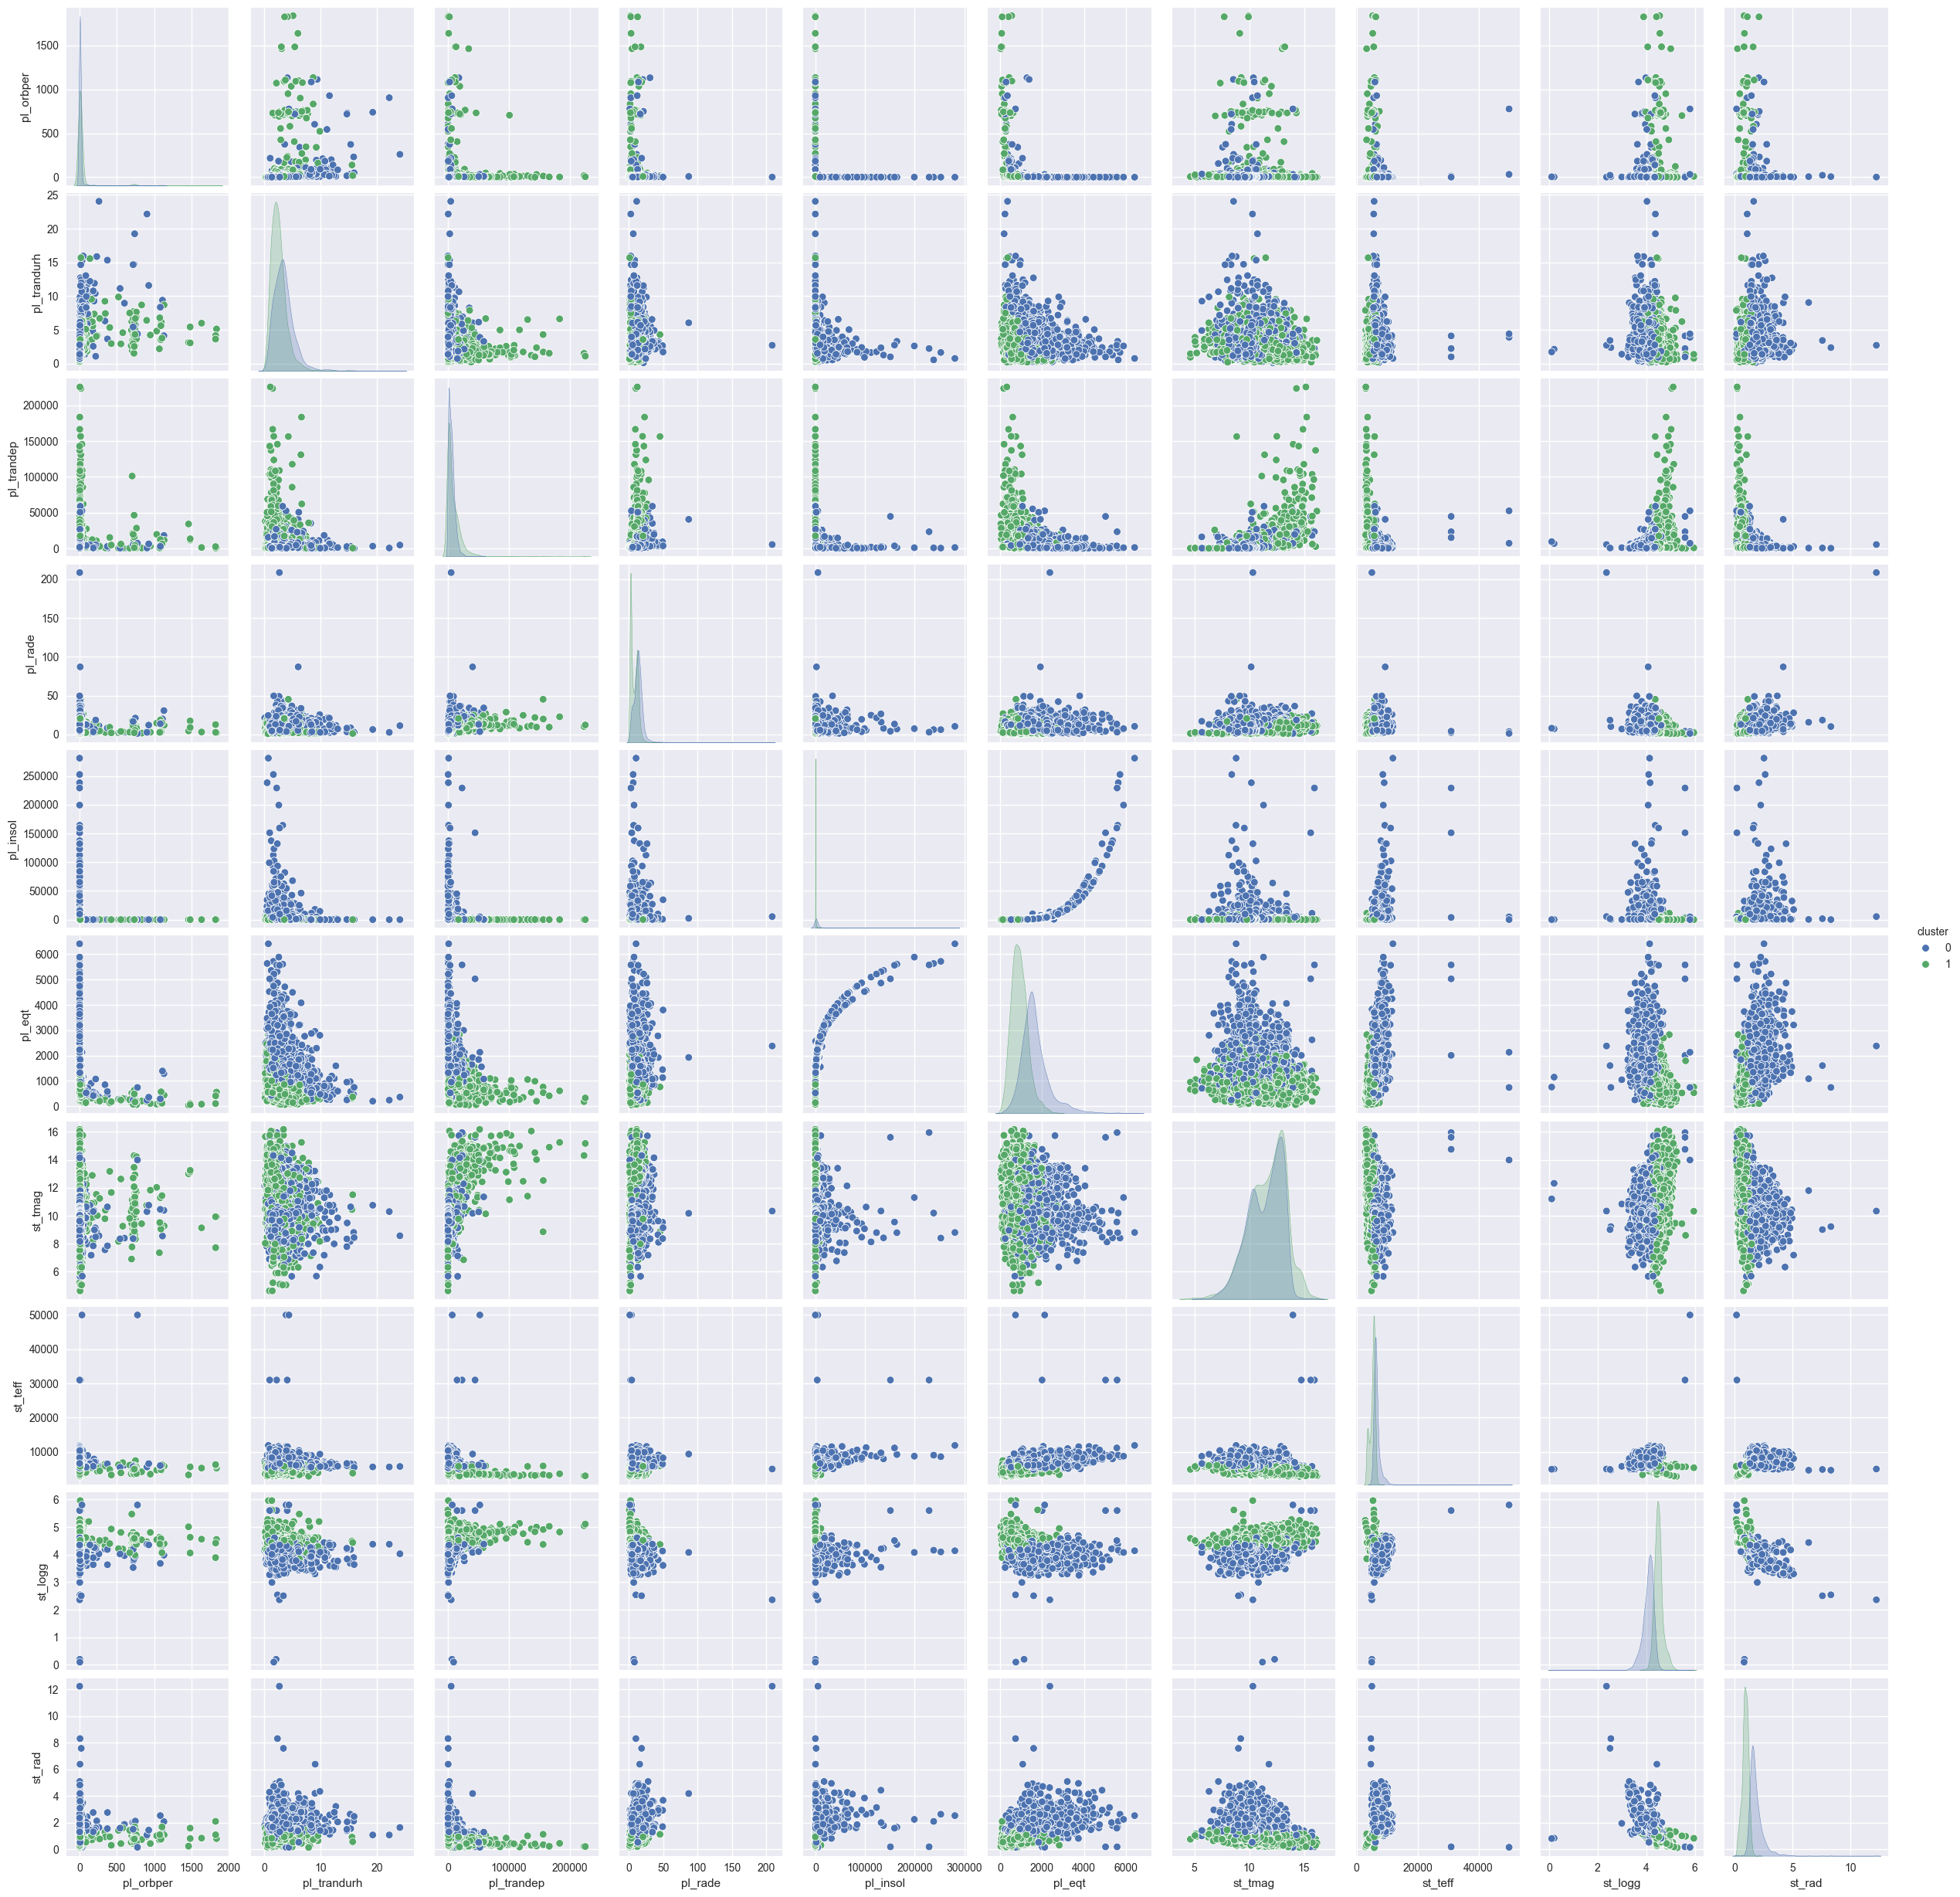

In [466]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming df_tess_ml is already defined and preprocessed
columns_to_use = [
    'pl_orbper',      # Planet Orbital Period Value [days]
    'pl_trandurh',    # Planet Transit Duration Value [hours]
    'pl_trandep',     # Planet Transit Depth Value [ppm]
    'pl_rade',        # Planet Radius Value [R_Earth]
    'pl_insol',       # Planet Insolation Value [Earth flux]
    'pl_eqt',         # Planet Equilibrium Temperature Value [K]
    'st_tmag',        # TESS Magnitude
    'st_teff',        # Stellar Effective Temperature Value [K]
    'st_logg',        # Stellar log(g) Value [cm/s**2]
    'st_rad'          # Stellar Radius Value [R_Sun]
]

df_tess_ml = df_filter_tess_2[columns_to_use].dropna()

# Scale the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(df_tess_ml)

# Apply K-Means clustering
kmeans = KMeans(n_clusters=2, random_state=42)
df_tess_ml['cluster'] = kmeans.fit_predict(X_scaled)

# Analyze the clusters
print(df_tess_ml['cluster'].value_counts())

# Visualize the clusters
sns.pairplot(df_tess_ml, hue='cluster', diag_kind='kde')
plt.show()

## 6 - Kepler 

### 6.1. Data Cleaning

In [467]:
file_kepler = 'kepler.csv'
df_kepler = pd.read_csv(file_kepler)

df_kepler

,rowid,kepid,kepoi_name,kepler_name,koi_disposition,koi_vet_stat,koi_vet_date,koi_pdisposition,koi_score,koi_fpflag_nt,koi_fpflag_ss,koi_fpflag_co,koi_fpflag_ec,koi_disp_prov,koi_comment,koi_period,koi_period_err1,koi_period_err2,koi_time0bk,koi_time0bk_err1,koi_time0bk_err2,koi_time0,koi_time0_err1,koi_time0_err2,koi_eccen,koi_eccen_err1,koi_eccen_err2,koi_longp,koi_longp_err1,koi_longp_err2,koi_impact,koi_impact_err1,koi_impact_err2,koi_duration,koi_duration_err1,koi_duration_err2,koi_ingress,koi_ingress_err1,koi_ingress_err2,koi_depth,koi_depth_err1,koi_depth_err2,koi_ror,koi_ror_err1,koi_ror_err2,koi_srho,koi_srho_err1,koi_srho_err2,koi_fittype,koi_prad,koi_prad_err1,koi_prad_err2,koi_sma,koi_sma_err1,koi_sma_err2,koi_incl,koi_incl_err1,koi_incl_err2,koi_teq,koi_teq_err1,koi_teq_err2,koi_insol,koi_insol_err1,koi_insol_err2,koi_dor,koi_dor_err1,koi_dor_err2,koi_limbdark_mod,koi_ldm_coeff4,koi_ldm_coeff3,koi_ldm_coeff2,koi_ldm_coeff1,koi_parm_prov,koi_max_sngle_ev,koi_max_mult_ev,koi_model_snr,koi_count,koi_num_transits,koi_tce_plnt_num,koi_tce_delivname,koi_quarters,koi_bin_oedp_sig,koi_trans_mod,koi_model_dof,koi_model_chisq,koi_datalink_dvr,koi_datalink_dvs,koi_steff,koi_steff_err1,koi_steff_err2,koi_slogg,koi_slogg_err1,koi_slogg_err2,koi_smet,koi_smet_err1,koi_smet_err2,koi_srad,koi_srad_err1,koi_srad_err2,koi_smass,koi_smass_err1,koi_smass_err2,koi_sage,koi_sage_err1,koi_sage_err2,koi_sparprov,ra,dec,koi_kepmag,koi_gmag,koi_rmag,koi_imag,koi_zmag,koi_jmag,koi_hmag,koi_kmag,koi_fwm_stat_sig,koi_fwm_sra,koi_fwm_sra_err,koi_fwm_sdec,koi_fwm_sdec_err,koi_fwm_srao,koi_fwm_srao_err,koi_fwm_sdeco,koi_fwm_sdeco_err,koi_fwm_prao,koi_fwm_prao_err,koi_fwm_pdeco,koi_fwm_pdeco_err,koi_dicco_mra,koi_dicco_mra_err,koi_dicco_mdec,koi_dicco_mdec_err,koi_dicco_msky,koi_dicco_msky_err,koi_dikco_mra,koi_dikco_mra_err,koi_dikco_mdec,koi_dikco_mdec_err,koi_dikco_msky,koi_dikco_msky_err
0,1,10797460,K00752.01,Kepler-227 b,CONFIRMED,Done,2018-08-16,CANDIDATE,1.000,0,0,0,0,q1_q17_dr25_sup_koi,NO_COMMENT,9.488036,2.775000e-05,-2.775000e-05,170.538750,0.002160,-0.002160,2455003.539,0.002160,-0.002160,0.0,NaN,NaN,NaN,NaN,NaN,0.146,0.318,-0.146,2.95750,0.08190,-0.08190,NaN,NaN,NaN,615.8,19.5,-19.5,0.022344,0.000832,-0.000528,3.20796,0.33173,-1.09986,LS+MCMC,2.26,0.26,-0.15,0.0853,NaN,NaN,89.66,NaN,NaN,793.0,NaN,NaN,93.59,29.45,-16.65,24.810,2.600,-2.600,Claret (2011 A&A 529 75) ATLAS LS,0.0,0.0,0.2291,0.4603,q1_q17_dr25_koi,5.135849,28.470820,35.8,2,142.0,1.0,q1_q17_dr25_tce,11111111111111111000000000000000,0.6864,Mandel and Agol (2002 ApJ 580 171),NaN,NaN,010/010797/010797460/dv/kplr010797460-20160209...,010/010797/010797460/dv/kplr010797460-001-2016...,5455.0,81.0,-81.0,4.467,0.064,-0.096,0.14,0.15,-0.15,0.927,0.105,-0.061,0.919,0.052,-0.046,NaN,NaN,NaN,q1_q17_dr25_stellar,291.93423,48.141651,15.347,15.890,15.270,15.114,15.006,14.082,13.751,13.648,0.002,19.462294,1.400000e-05,48.141910,0.000130,0.430,0.510,0.940,0.480,-0.000200,0.000320,-0.000550,0.000310,-0.010,0.130,0.200,0.160,0.200,0.170,0.080,0.130,0.310,0.170,0.320,0.160
1,2,10797460,K00752.02,Kepler-227 c,CONFIRMED,Done,2018-08-16,CANDIDATE,0.969,0,0,0,0,q1_q17_dr25_sup_koi,NO_COMMENT,54.418383,2.479000e-04,-2.479000e-04,162.513840,0.003520,-0.003520,2454995.514,0.003520,-0.003520,0.0,NaN,NaN,NaN,NaN,NaN,0.586,0.059,-0.443,4.50700,0.11600,-0.11600,NaN,NaN,NaN,874.8,35.5,-35.5,0.027954,0.009078,-0.001347,3.02368,2.20489,-2.49638,LS+MCMC,2.83,0.32,-0.19,0.2734,NaN,NaN,89.57,NaN,NaN,443.0,NaN,NaN,9.11,2.87,-1.62,77.900,28.400,-28.400,Claret (2011 A&A 529 75) ATLAS LS,0.0,0.0,0.2291,0.4603,q1_q17_dr25_koi,7.027669,20.109507,25.8,2,25.0,2.0,q1_q17_dr25_tce,11111111111111111000000000000000,0.0023,Mandel and Agol (2002 ApJ 580 171),NaN,NaN,010/010797/010797460/dv/kplr010797460-20160209...,010/010797/010797460/dv/kplr010797460-002-2016...,5455.0,81.0,-81.0,4.467,0.064,-0.096,0.14,0.15,-0.15,0.927,0.105,-0.061,0.919,0.052,-0.046,NaN,NaN,NaN,q1_q17_dr25_stellar,291.93423,48.141651,15.347,15.890,15.

In [468]:
# List of columns from the DataFrame
column_names = [
    'kepid', 'kepoi_name', 'kepler_name', 'koi_disposition', 'koi_vet_stat', 
    'koi_vet_date', 'koi_pdisposition', 'koi_score', 'koi_fpflag_nt', 'koi_fpflag_ss', 
    'koi_fpflag_co', 'koi_fpflag_ec', 'koi_disp_prov', 'koi_comment', 'koi_period', 
    'koi_period_err1', 'koi_period_err2', 'koi_time0bk', 'koi_time0bk_err1', 
    'koi_time0bk_err2', 'koi_time0', 'koi_time0_err1', 'koi_time0_err2', 'koi_eccen', 
    'koi_eccen_err1', 'koi_eccen_err2', 'koi_longp', 'koi_longp_err1', 'koi_longp_err2', 
    'koi_impact', 'koi_impact_err1', 'koi_impact_err2', 'koi_duration', 
    'koi_duration_err1', 'koi_duration_err2', 'koi_ingress', 'koi_ingress_err1', 
    'koi_ingress_err2', 'koi_depth', 'koi_depth_err1', 'koi_depth_err2', 'koi_ror', 
    'koi_ror_err1', 'koi_ror_err2', 'koi_srho', 'koi_srho_err1', 'koi_srho_err2', 
    'koi_fittype', 'koi_prad', 'koi_prad_err1', 'koi_prad_err2', 'koi_sma', 
    'koi_sma_err1', 'koi_sma_err2', 'koi_incl', 'koi_incl_err1', 'koi_incl_err2', 
    'koi_teq', 'koi_teq_err1', 'koi_teq_err2', 'koi_insol', 'koi_insol_err1', 
    'koi_insol_err2', 'koi_dor', 'koi_dor_err1', 'koi_dor_err2', 'koi_limbdark_mod', 
    'koi_ldm_coeff4', 'koi_ldm_coeff3', 'koi_ldm_coeff2', 'koi_ldm_coeff1', 
    'koi_parm_prov', 'koi_max_sngle_ev', 'koi_max_mult_ev', 'koi_model_snr', 
    'koi_count', 'koi_num_transits', 'koi_tce_plnt_num', 'koi_tce_delivname', 
    'koi_quarters', 'koi_bin_oedp_sig', 'koi_trans_mod', 'koi_model_dof', 
    'koi_model_chisq', 'koi_datalink_dvr', 'koi_datalink_dvs', 'koi_steff', 
    'koi_steff_err1', 'koi_steff_err2', 'koi_slogg', 'koi_slogg_err1', 'koi_slogg_err2', 
    'koi_smet', 'koi_smet_err1', 'koi_smet_err2', 'koi_srad', 'koi_srad_err1', 
    'koi_srad_err2', 'koi_smass', 'koi_smass_err1', 'koi_smass_err2', 'koi_sage', 
    'koi_sage_err1', 'koi_sage_err2', 'koi_sparprov', 'ra', 'dec', 'koi_kepmag', 
    'koi_gmag', 'koi_rmag', 'koi_imag', 'koi_zmag', 'koi_jmag', 'koi_hmag', 
    'koi_kmag', 'koi_fwm_stat_sig', 'koi_fwm_sra', 'koi_fwm_sra_err', 'koi_fwm_sdec', 
    'koi_fwm_sdec_err', 'koi_fwm_srao', 'koi_fwm_srao_err', 'koi_fwm_sdeco', 
    'koi_fwm_sdeco_err', 'koi_fwm_prao', 'koi_fwm_prao_err', 'koi_fwm_pdeco', 
    'koi_fwm_pdeco_err', 'koi_dicco_mra', 'koi_dicco_mra_err', 'koi_dicco_mdec', 
    'koi_dicco_mdec_err', 'koi_dicco_msky', 'koi_dicco_msky_err', 'koi_dikco_mra', 
    'koi_dikco_mra_err', 'koi_dikco_mdec', 'koi_dikco_mdec_err', 'koi_dikco_msky', 
    'koi_dikco_msky_err'
]


# Get the list of existing columns in the DataFrame
existing_columns = df_kepler.columns.tolist()

# Filter columns that end with 'err', 'err1', 'err2', or 'lim'
columns_to_drop = [col for col in columns if col.endswith(('err', 'err1', 'err2', 'lim'))]
columns_to_drop = [col for col in columns_to_drop if col in existing_columns]

# Drop the columns
df_filtered_kepler = df_kepler.drop(columns=columns_to_drop)

df_filtered_kepler

,rowid,kepid,kepoi_name,kepler_name,koi_disposition,koi_vet_stat,koi_vet_date,koi_pdisposition,koi_score,koi_fpflag_nt,koi_fpflag_ss,koi_fpflag_co,koi_fpflag_ec,koi_disp_prov,koi_comment,koi_period,koi_period_err1,koi_period_err2,koi_time0bk,koi_time0bk_err1,koi_time0bk_err2,koi_time0,koi_time0_err1,koi_time0_err2,koi_eccen,koi_eccen_err1,koi_eccen_err2,koi_longp,koi_longp_err1,koi_longp_err2,koi_impact,koi_impact_err1,koi_impact_err2,koi_duration,koi_duration_err1,koi_duration_err2,koi_ingress,koi_ingress_err1,koi_ingress_err2,koi_depth,koi_depth_err1,koi_depth_err2,koi_ror,koi_ror_err1,koi_ror_err2,koi_srho,koi_srho_err1,koi_srho_err2,koi_fittype,koi_prad,koi_prad_err1,koi_prad_err2,koi_sma,koi_sma_err1,koi_sma_err2,koi_incl,koi_incl_err1,koi_incl_err2,koi_teq,koi_teq_err1,koi_teq_err2,koi_insol,koi_insol_err1,koi_insol_err2,koi_dor,koi_dor_err1,koi_dor_err2,koi_limbdark_mod,koi_ldm_coeff4,koi_ldm_coeff3,koi_ldm_coeff2,koi_ldm_coeff1,koi_parm_prov,koi_max_sngle_ev,koi_max_mult_ev,koi_model_snr,koi_count,koi_num_transits,koi_tce_plnt_num,koi_tce_delivname,koi_quarters,koi_bin_oedp_sig,koi_trans_mod,koi_model_dof,koi_model_chisq,koi_datalink_dvr,koi_datalink_dvs,koi_steff,koi_steff_err1,koi_steff_err2,koi_slogg,koi_slogg_err1,koi_slogg_err2,koi_smet,koi_smet_err1,koi_smet_err2,koi_srad,koi_srad_err1,koi_srad_err2,koi_smass,koi_smass_err1,koi_smass_err2,koi_sage,koi_sage_err1,koi_sage_err2,koi_sparprov,ra,dec,koi_kepmag,koi_gmag,koi_rmag,koi_imag,koi_zmag,koi_jmag,koi_hmag,koi_kmag,koi_fwm_stat_sig,koi_fwm_sra,koi_fwm_sra_err,koi_fwm_sdec,koi_fwm_sdec_err,koi_fwm_srao,koi_fwm_srao_err,koi_fwm_sdeco,koi_fwm_sdeco_err,koi_fwm_prao,koi_fwm_prao_err,koi_fwm_pdeco,koi_fwm_pdeco_err,koi_dicco_mra,koi_dicco_mra_err,koi_dicco_mdec,koi_dicco_mdec_err,koi_dicco_msky,koi_dicco_msky_err,koi_dikco_mra,koi_dikco_mra_err,koi_dikco_mdec,koi_dikco_mdec_err,koi_dikco_msky,koi_dikco_msky_err
0,1,10797460,K00752.01,Kepler-227 b,CONFIRMED,Done,2018-08-16,CANDIDATE,1.000,0,0,0,0,q1_q17_dr25_sup_koi,NO_COMMENT,9.488036,2.775000e-05,-2.775000e-05,170.538750,0.002160,-0.002160,2455003.539,0.002160,-0.002160,0.0,NaN,NaN,NaN,NaN,NaN,0.146,0.318,-0.146,2.95750,0.08190,-0.08190,NaN,NaN,NaN,615.8,19.5,-19.5,0.022344,0.000832,-0.000528,3.20796,0.33173,-1.09986,LS+MCMC,2.26,0.26,-0.15,0.0853,NaN,NaN,89.66,NaN,NaN,793.0,NaN,NaN,93.59,29.45,-16.65,24.810,2.600,-2.600,Claret (2011 A&A 529 75) ATLAS LS,0.0,0.0,0.2291,0.4603,q1_q17_dr25_koi,5.135849,28.470820,35.8,2,142.0,1.0,q1_q17_dr25_tce,11111111111111111000000000000000,0.6864,Mandel and Agol (2002 ApJ 580 171),NaN,NaN,010/010797/010797460/dv/kplr010797460-20160209...,010/010797/010797460/dv/kplr010797460-001-2016...,5455.0,81.0,-81.0,4.467,0.064,-0.096,0.14,0.15,-0.15,0.927,0.105,-0.061,0.919,0.052,-0.046,NaN,NaN,NaN,q1_q17_dr25_stellar,291.93423,48.141651,15.347,15.890,15.270,15.114,15.006,14.082,13.751,13.648,0.002,19.462294,1.400000e-05,48.141910,0.000130,0.430,0.510,0.940,0.480,-0.000200,0.000320,-0.000550,0.000310,-0.010,0.130,0.200,0.160,0.200,0.170,0.080,0.130,0.310,0.170,0.320,0.160
1,2,10797460,K00752.02,Kepler-227 c,CONFIRMED,Done,2018-08-16,CANDIDATE,0.969,0,0,0,0,q1_q17_dr25_sup_koi,NO_COMMENT,54.418383,2.479000e-04,-2.479000e-04,162.513840,0.003520,-0.003520,2454995.514,0.003520,-0.003520,0.0,NaN,NaN,NaN,NaN,NaN,0.586,0.059,-0.443,4.50700,0.11600,-0.11600,NaN,NaN,NaN,874.8,35.5,-35.5,0.027954,0.009078,-0.001347,3.02368,2.20489,-2.49638,LS+MCMC,2.83,0.32,-0.19,0.2734,NaN,NaN,89.57,NaN,NaN,443.0,NaN,NaN,9.11,2.87,-1.62,77.900,28.400,-28.400,Claret (2011 A&A 529 75) ATLAS LS,0.0,0.0,0.2291,0.4603,q1_q17_dr25_koi,7.027669,20.109507,25.8,2,25.0,2.0,q1_q17_dr25_tce,11111111111111111000000000000000,0.0023,Mandel and Agol (2002 ApJ 580 171),NaN,NaN,010/010797/010797460/dv/kplr010797460-20160209...,010/010797/010797460/dv/kplr010797460-002-2016...,5455.0,81.0,-81.0,4.467,0.064,-0.096,0.14,0.15,-0.15,0.927,0.105,-0.061,0.919,0.052,-0.046,NaN,NaN,NaN,q1_q17_dr25_stellar,291.93423,48.141651,15.347,15.890,15.

### 6.2 - Random Forest Classifier

This uses koi_distribution ( data observed with kepler and other telescopes) which values are either confirmed or false positive to train the model. It compares the prediction to the actual values from koi_distribution.

To sum up, this tests the model with exoplanets that are already classified.

In [469]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.preprocessing import StandardScaler, LabelEncoder

# Assuming df_filtered_kepler2 is already defined and preprocessed
# Select relevant columns
columns = [
    "koi_period", "koi_time0", "koi_duration", "koi_ror", "koi_impact", "koi_eccen",
    "koi_prad", "koi_teq", "koi_insol", "koi_dor"
]

# Filter the DataFrame to include only the relevant columns and drop rows with missing values
df_filtered_kepler2 = df_filtered_kepler[columns + ['koi_disposition', 'koi_pdisposition']].dropna()

# Filter for training data where koi_disposition is either CONFIRMED or FALSE POSITIVE
df_train = df_filtered_kepler2[df_filtered_kepler2['koi_disposition'].isin(['CONFIRMED', 'FALSE POSITIVE'])]

# Encode the target variable
label_encoder = LabelEncoder()
df_train['koi_disposition'] = label_encoder.fit_transform(df_train['koi_disposition'])

# Separate features and target for training
X_train = df_train[columns]
y_train = df_train['koi_disposition']

# Check class balance
print("Class distribution in training data:")
print(df_train['koi_disposition'].value_counts())

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_train, y_train, test_size=0.2, random_state=42, stratify=y_train)

# Scale the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Train a RandomForestClassifier with default parameters
model = RandomForestClassifier(random_state=42)
model.fit(X_train_scaled, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test_scaled)

# Evaluate the model
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))
print("\nClassification Report:")
print(classification_report(y_test, y_pred))


C:\Users\Usuario\AppData\Local\Temp\ipykernel_10868\3019774257.py:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_train['koi_disposition'] = label_encoder.fit_transform(df_train['koi_disposition'])


Class distribution in training data:
koi_disposition
1    4582
0    2741
Name: count, dtype: int64
Confusion Matrix:
[[491  57]
 [ 73 844]]

Classification Report:
              precision    recall  f1-score   support

           0       0.87      0.90      0.88       548
           1       0.94      0.92      0.93       917

    accuracy                           0.91      1465
   macro avg       0.90      0.91      0.91      1465
weighted avg       0.91      0.91      0.91      1465



this part is using the model to predict the results of not yet solved candidates

In [470]:
# Filter the DataFrame for CANDIDATE entries
df_candidates = df_filtered_kepler2[df_filtered_kepler2['koi_disposition'] == 'CANDIDATE']

# Separate features for candidates
X_candidates = df_candidates[columns]

# Scale the candidate data using the previously fitted scaler
X_candidates_scaled = scaler.transform(X_candidates)

# Make predictions on candidate data
y_candidates_pred = model.predict(X_candidates_scaled)

# Map predictions back to original labels
y_candidates_pred_labels = label_encoder.inverse_transform(y_candidates_pred)

# Display predictions for candidates
df_candidates['Predicted_Disposition'] = y_candidates_pred_labels
print(df_candidates[['koi_disposition', 'Predicted_Disposition']])
print(df_candidates['Predicted_Disposition'].value_counts())


     koi_disposition Predicted_Disposition
2          CANDIDATE        FALSE POSITIVE
58         CANDIDATE             CONFIRMED
62         CANDIDATE             CONFIRMED
63         CANDIDATE        FALSE POSITIVE
84         CANDIDATE        FALSE POSITIVE
...              ...                   ...
9538       CANDIDATE             CONFIRMED
9542       CANDIDATE        FALSE POSITIVE
9552       CANDIDATE        FALSE POSITIVE
9560       CANDIDATE        FALSE POSITIVE
9562       CANDIDATE        FALSE POSITIVE

[1878 rows x 2 columns]
Predicted_Disposition
FALSE POSITIVE    972
CONFIRMED         906
Name: count, dtype: int64


C:\Users\Usuario\AppData\Local\Temp\ipykernel_10868\4080153156.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_candidates['Predicted_Disposition'] = y_candidates_pred_labels


On the other hand, this uses the model from the last part and ALSO uses koi_pdistribution ( data observed only with kepler telescopes) where values are 'candidate' to see how the model classifies the candidates. Then discard candidates that are not yet solved (data with candidate values in both koi_distribution and koi_pdistribution). 

To sum up, this tests the model with exoplanets that were candidates, and later were resolved as confirmed or false positives.

The issue with this, is that there is no candidate that was later changed to false positive (eg 0 in the confusion matrix).

In [471]:
from sklearn.metrics import classification_report, confusion_matrix

# Step 1: Filter candidate exoplanets (those with koi_pdisposition == 'CANDIDATE')
df_candidates = df_filtered_kepler2[df_filtered_kepler2['koi_pdisposition'] == 'CANDIDATE']

# Scale the features of candidate exoplanets
X_candidates = df_candidates[columns]
X_candidates_scaled = scaler.transform(X_candidates)

# Predict on the candidate exoplanets
candidate_predictions = model.predict(X_candidates_scaled)

# Compare predictions with actual koi_disposition values, but exclude unresolved candidates
df_candidates['predicted_disposition'] = label_encoder.inverse_transform(candidate_predictions)

# Step 2: Filter out the candidates that actually have known dispositions (not 'CANDIDATE')
df_non_candidate = df_candidates[df_candidates['koi_disposition'].isin(['CONFIRMED', 'FALSE POSITIVE'])]

# Step 3: Evaluate the predictions (confusion matrix and classification report)
y_true = df_non_candidate['koi_disposition']
y_pred = df_non_candidate['predicted_disposition']

# Generate confusion matrix and classification report
print("Confusion Matrix for Candidate Exoplanets:")
print(confusion_matrix(y_true, y_pred))

print("\nClassification Report for Candidate Exoplanets:")
print(classification_report(y_true, y_pred))
# Compare predictions with actual values in koi_disposition, excluding candidates
df_candidates['actual_disposition'] = df_candidates['koi_disposition']
df_non_candidate = df_candidates[df_candidates['actual_disposition'] != 'CANDIDATE']

# Count the number of correct predictions
correct_predictions = (df_non_candidate['predicted_disposition'] == df_non_candidate['actual_disposition']).sum()
total_non_candidates = df_non_candidate.shape[0]

print(f"Number of correct predictions (excluding candidates): {correct_predictions} out of {total_non_candidates}")
print(f"Accuracy on non-candidate exoplanets: {correct_predictions / total_non_candidates:.2f}")


Confusion Matrix for Candidate Exoplanets:
[[2677   56]
 [   1    0]]

Classification Report for Candidate Exoplanets:
                precision    recall  f1-score   support

     CONFIRMED       1.00      0.98      0.99      2733
FALSE POSITIVE       0.00      0.00      0.00         1

      accuracy                           0.98      2734
     macro avg       0.50      0.49      0.49      2734
  weighted avg       1.00      0.98      0.99      2734

Number of correct predictions (excluding candidates): 2677 out of 2734
Accuracy on non-candidate exoplanets: 0.98


C:\Users\Usuario\AppData\Local\Temp\ipykernel_10868\2727355873.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_candidates['predicted_disposition'] = label_encoder.inverse_transform(candidate_predictions)
C:\Users\Usuario\AppData\Local\Temp\ipykernel_10868\2727355873.py:30: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_candidates['actual_disposition'] = df_candidates['koi_disposition']


## RELACAO ENTRE MASSA E DISTANCIA DE UM PLANETA ATE A ESTRELA

## 7 - K2

In [472]:
file_kepler = 'k2_candidates.csv'
df_k2 = pd.read_csv(file_kepler)

df_k2

,rowid,pl_name,hostname,pl_letter,k2_name,epic_hostname,epic_candname,hd_name,hip_name,tic_id,gaia_id,default_flag,disposition,disp_refname,sy_snum,sy_pnum,sy_mnum,cb_flag,discoverymethod,disc_year,disc_refname,disc_pubdate,disc_locale,disc_facility,disc_telescope,disc_instrument,rv_flag,pul_flag,ptv_flag,tran_flag,ast_flag,obm_flag,micro_flag,etv_flag,ima_flag,dkin_flag,soltype,pl_controv_flag,pl_refname,pl_orbper,pl_orbpererr1,pl_orbpererr2,pl_orbperlim,pl_orbsmax,pl_orbsmaxerr1,pl_orbsmaxerr2,pl_orbsmaxlim,pl_rade,pl_radeerr1,pl_radeerr2,pl_radelim,pl_radj,pl_radjerr1,pl_radjerr2,pl_radjlim,pl_masse,pl_masseerr1,pl_masseerr2,pl_masselim,pl_massj,pl_massjerr1,pl_massjerr2,pl_massjlim,pl_msinie,pl_msinieerr1,pl_msinieerr2,pl_msinielim,pl_msinij,pl_msinijerr1,pl_msinijerr2,pl_msinijlim,pl_cmasse,pl_cmasseerr1,pl_cmasseerr2,pl_cmasselim,pl_cmassj,pl_cmassjerr1,pl_cmassjerr2,pl_cmassjlim,pl_bmasse,pl_bmasseerr1,pl_bmasseerr2,pl_bmasselim,pl_bmassj,pl_bmassjerr1,pl_bmassjerr2,pl_bmassjlim,pl_bmassprov,pl_dens,pl_denserr1,pl_denserr2,pl_denslim,pl_orbeccen,pl_orbeccenerr1,pl_orbeccenerr2,pl_orbeccenlim,pl_insol,pl_insolerr1,pl_insolerr2,pl_insollim,pl_eqt,pl_eqterr1,pl_eqterr2,pl_eqtlim,pl_orbincl,pl_orbinclerr1,pl_orbinclerr2,pl_orbincllim,pl_tranmid,pl_tranmiderr1,pl_tranmiderr2,pl_tranmidlim,pl_tsystemref,ttv_flag,pl_imppar,pl_impparerr1,pl_impparerr2,pl_impparlim,pl_trandep,pl_trandeperr1,pl_trandeperr2,pl_trandeplim,pl_trandur,pl_trandurerr1,pl_trandurerr2,pl_trandurlim,pl_ratdor,pl_ratdorerr1,pl_ratdorerr2,pl_ratdorlim,pl_ratror,pl_ratrorerr1,pl_ratrorerr2,pl_ratrorlim,pl_occdep,pl_occdeperr1,pl_occdeperr2,pl_occdeplim,pl_orbtper,pl_orbtpererr1,pl_orbtpererr2,pl_orbtperlim,pl_orblper,pl_orblpererr1,pl_orblpererr2,pl_orblperlim,pl_rvamp,pl_rvamperr1,pl_rvamperr2,pl_rvamplim,pl_projobliq,pl_projobliqerr1,pl_projobliqerr2,pl_projobliqlim,pl_trueobliq,pl_trueobliqerr1,pl_trueobliqerr2,pl_trueobliqlim,st_refname,st_spectype,st_teff,st_tefferr1,st_tefferr2,st_tefflim,st_rad,st_raderr1,st_raderr2,st_radlim,st_mass,st_masserr1,st_masserr2,st_masslim,st_met,st_meterr1,st_meterr2,st_metlim,st_metratio,st_lum,st_lumerr1,st_lumerr2,st_lumlim,st_logg,st_loggerr1,st_loggerr2,st_logglim,st_age,st_ageerr1,st_ageerr2,st_agelim,st_dens,st_denserr1,st_denserr2,st_denslim,st_vsin,st_vsinerr1,st_vsinerr2,st_vsinlim,st_rotp,st_rotperr1,st_rotperr2,st_rotplim,st_radv,st_radverr1,st_radverr2,st_radvlim,sy_refname,rastr,ra,decstr,dec,glat,glon,elat,elon,sy_pm,sy_pmerr1,sy_pmerr2,sy_pmra,sy_pmraerr1,sy_pmraerr2,sy_pmdec,sy_pmdecerr1,sy_pmdecerr2,sy_dist,sy_disterr1,sy_disterr2,sy_plx,sy_plxerr1,sy_plxerr2,sy_bmag,sy_bmagerr1,sy_bmagerr2,sy_vmag,sy_vmagerr1,sy_vmagerr2,sy_jmag,sy_jmagerr1,sy_jmagerr2,sy_hmag,sy_hmagerr1,sy_hmagerr2,sy_kmag,sy_kmagerr1,sy_kmagerr2,sy_umag,sy_umagerr1,sy_umagerr2,sy_gmag,sy_gmagerr1,sy_gmagerr2,sy_rmag,sy_rmagerr1,sy_rmagerr2,sy_imag,sy_imagerr1,sy_imagerr2,sy_zmag,sy_zmagerr1,sy_zmagerr2,sy_w1mag,sy_w1magerr1,sy_w1magerr2,sy_w2mag,sy_w2magerr1,sy_w2magerr2,sy_w3mag,sy_w3magerr1,sy_w3magerr2,sy_w4mag,sy_w4magerr1,sy_w4magerr2,sy_gaiamag,sy_gaiamagerr1,sy_gaiamagerr2,sy_icmag,sy_icmagerr1,sy_icmagerr2,sy_tmag,sy_tmagerr1,sy_tmagerr2,sy_kepmag,sy_kepmagerr1,sy_kepmagerr2,rowupdate,pl_pubdate,releasedate,pl_nnotes,k2_campaigns,k2_campaigns_num,st_nphot,st_nrvc,st_nspec,pl_nespec,pl_ntranspec
0,1,BD+20 594 b,BD+20 594,b,K2-56 b,EPIC 210848071,EPIC 210848071.01,NaN,NaN,TIC 26123781,Gaia DR2 58200934326315136,1,CONFIRMED,Espinoza et al. 2016,1,1,0,0,Transit,2016,<a refstr=ESPINOZA_ET_AL__2016 href=https://ui...,2016-10,Space,K2,0.95 m Kepler Telescope,Kepler CCD Array,1,0,0,1,0,0,0,0,0,0,Published Confirmed,0,<a refstr=STASSUN_ET_AL__2017 href=https://ui....,41.685500,3.000000e-03,-3.000000e-03,0.0,NaN,NaN,NaN,NaN,2.578,0.112,-0.112,0.0,0.230,0.010,-0.010,0.0,22.2481,9.5349,-9.5349,0.0,0.07000,0.03000,-0.03000,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,22.2481,9.5349,-9.5349,0.0,0.07000,0.03000,-0.030

In [473]:
# List of columns from the DataFrame
column_names = [
    'kepid', 'kepoi_name', 'kepler_name', 'koi_disposition', 'koi_vet_stat', 
    'koi_vet_date', 'koi_pdisposition', 'koi_score', 'koi_fpflag_nt', 'koi_fpflag_ss', 
    'koi_fpflag_co', 'koi_fpflag_ec', 'koi_disp_prov', 'koi_comment', 'koi_period', 
    'koi_period_err1', 'koi_period_err2', 'koi_time0bk', 'koi_time0bk_err1', 
    'koi_time0bk_err2', 'koi_time0', 'koi_time0_err1', 'koi_time0_err2', 'koi_eccen', 
    'koi_eccen_err1', 'koi_eccen_err2', 'koi_longp', 'koi_longp_err1', 'koi_longp_err2', 
    'koi_impact', 'koi_impact_err1', 'koi_impact_err2', 'koi_duration', 
    'koi_duration_err1', 'koi_duration_err2', 'koi_ingress', 'koi_ingress_err1', 
    'koi_ingress_err2', 'koi_depth', 'koi_depth_err1', 'koi_depth_err2', 'koi_ror', 
    'koi_ror_err1', 'koi_ror_err2', 'koi_srho', 'koi_srho_err1', 'koi_srho_err2', 
    'koi_fittype', 'koi_prad', 'koi_prad_err1', 'koi_prad_err2', 'koi_sma', 
    'koi_sma_err1', 'koi_sma_err2', 'koi_incl', 'koi_incl_err1', 'koi_incl_err2', 
    'koi_teq', 'koi_teq_err1', 'koi_teq_err2', 'koi_insol', 'koi_insol_err1', 
    'koi_insol_err2', 'koi_dor', 'koi_dor_err1', 'koi_dor_err2', 'koi_limbdark_mod', 
    'koi_ldm_coeff4', 'koi_ldm_coeff3', 'koi_ldm_coeff2', 'koi_ldm_coeff1', 
    'koi_parm_prov', 'koi_max_sngle_ev', 'koi_max_mult_ev', 'koi_model_snr', 
    'koi_count', 'koi_num_transits', 'koi_tce_plnt_num', 'koi_tce_delivname', 
    'koi_quarters', 'koi_bin_oedp_sig', 'koi_trans_mod', 'koi_model_dof', 
    'koi_model_chisq', 'koi_datalink_dvr', 'koi_datalink_dvs', 'koi_steff', 
    'koi_steff_err1', 'koi_steff_err2', 'koi_slogg', 'koi_slogg_err1', 'koi_slogg_err2', 
    'koi_smet', 'koi_smet_err1', 'koi_smet_err2', 'koi_srad', 'koi_srad_err1', 
    'koi_srad_err2', 'koi_smass', 'koi_smass_err1', 'koi_smass_err2', 'koi_sage', 
    'koi_sage_err1', 'koi_sage_err2', 'koi_sparprov', 'ra', 'dec', 'koi_kepmag', 
    'koi_gmag', 'koi_rmag', 'koi_imag', 'koi_zmag', 'koi_jmag', 'koi_hmag', 
    'koi_kmag', 'koi_fwm_stat_sig', 'koi_fwm_sra', 'koi_fwm_sra_err', 'koi_fwm_sdec', 
    'koi_fwm_sdec_err', 'koi_fwm_srao', 'koi_fwm_srao_err', 'koi_fwm_sdeco', 
    'koi_fwm_sdeco_err', 'koi_fwm_prao', 'koi_fwm_prao_err', 'koi_fwm_pdeco', 
    'koi_fwm_pdeco_err', 'koi_dicco_mra', 'koi_dicco_mra_err', 'koi_dicco_mdec', 
    'koi_dicco_mdec_err', 'koi_dicco_msky', 'koi_dicco_msky_err', 'koi_dikco_mra', 
    'koi_dikco_mra_err', 'koi_dikco_mdec', 'koi_dikco_mdec_err', 'koi_dikco_msky', 
    'koi_dikco_msky_err'
]


# Get the list of existing columns in the DataFrame
existing_columns = df_k2.columns.tolist()

# Filter columns that end with 'err', 'err1', 'err2', or 'lim'
columns_to_drop = [col for col in columns if col.endswith(('err', 'err1', 'err2', 'lim'))]
columns_to_drop = [col for col in columns_to_drop if col in existing_columns]

# Drop the columns
df_k2_filtered = df_k2.drop(columns=columns_to_drop)

df_k2_filtered

,rowid,pl_name,hostname,pl_letter,k2_name,epic_hostname,epic_candname,hd_name,hip_name,tic_id,gaia_id,default_flag,disposition,disp_refname,sy_snum,sy_pnum,sy_mnum,cb_flag,discoverymethod,disc_year,disc_refname,disc_pubdate,disc_locale,disc_facility,disc_telescope,disc_instrument,rv_flag,pul_flag,ptv_flag,tran_flag,ast_flag,obm_flag,micro_flag,etv_flag,ima_flag,dkin_flag,soltype,pl_controv_flag,pl_refname,pl_orbper,pl_orbpererr1,pl_orbpererr2,pl_orbperlim,pl_orbsmax,pl_orbsmaxerr1,pl_orbsmaxerr2,pl_orbsmaxlim,pl_rade,pl_radeerr1,pl_radeerr2,pl_radelim,pl_radj,pl_radjerr1,pl_radjerr2,pl_radjlim,pl_masse,pl_masseerr1,pl_masseerr2,pl_masselim,pl_massj,pl_massjerr1,pl_massjerr2,pl_massjlim,pl_msinie,pl_msinieerr1,pl_msinieerr2,pl_msinielim,pl_msinij,pl_msinijerr1,pl_msinijerr2,pl_msinijlim,pl_cmasse,pl_cmasseerr1,pl_cmasseerr2,pl_cmasselim,pl_cmassj,pl_cmassjerr1,pl_cmassjerr2,pl_cmassjlim,pl_bmasse,pl_bmasseerr1,pl_bmasseerr2,pl_bmasselim,pl_bmassj,pl_bmassjerr1,pl_bmassjerr2,pl_bmassjlim,pl_bmassprov,pl_dens,pl_denserr1,pl_denserr2,pl_denslim,pl_orbeccen,pl_orbeccenerr1,pl_orbeccenerr2,pl_orbeccenlim,pl_insol,pl_insolerr1,pl_insolerr2,pl_insollim,pl_eqt,pl_eqterr1,pl_eqterr2,pl_eqtlim,pl_orbincl,pl_orbinclerr1,pl_orbinclerr2,pl_orbincllim,pl_tranmid,pl_tranmiderr1,pl_tranmiderr2,pl_tranmidlim,pl_tsystemref,ttv_flag,pl_imppar,pl_impparerr1,pl_impparerr2,pl_impparlim,pl_trandep,pl_trandeperr1,pl_trandeperr2,pl_trandeplim,pl_trandur,pl_trandurerr1,pl_trandurerr2,pl_trandurlim,pl_ratdor,pl_ratdorerr1,pl_ratdorerr2,pl_ratdorlim,pl_ratror,pl_ratrorerr1,pl_ratrorerr2,pl_ratrorlim,pl_occdep,pl_occdeperr1,pl_occdeperr2,pl_occdeplim,pl_orbtper,pl_orbtpererr1,pl_orbtpererr2,pl_orbtperlim,pl_orblper,pl_orblpererr1,pl_orblpererr2,pl_orblperlim,pl_rvamp,pl_rvamperr1,pl_rvamperr2,pl_rvamplim,pl_projobliq,pl_projobliqerr1,pl_projobliqerr2,pl_projobliqlim,pl_trueobliq,pl_trueobliqerr1,pl_trueobliqerr2,pl_trueobliqlim,st_refname,st_spectype,st_teff,st_tefferr1,st_tefferr2,st_tefflim,st_rad,st_raderr1,st_raderr2,st_radlim,st_mass,st_masserr1,st_masserr2,st_masslim,st_met,st_meterr1,st_meterr2,st_metlim,st_metratio,st_lum,st_lumerr1,st_lumerr2,st_lumlim,st_logg,st_loggerr1,st_loggerr2,st_logglim,st_age,st_ageerr1,st_ageerr2,st_agelim,st_dens,st_denserr1,st_denserr2,st_denslim,st_vsin,st_vsinerr1,st_vsinerr2,st_vsinlim,st_rotp,st_rotperr1,st_rotperr2,st_rotplim,st_radv,st_radverr1,st_radverr2,st_radvlim,sy_refname,rastr,ra,decstr,dec,glat,glon,elat,elon,sy_pm,sy_pmerr1,sy_pmerr2,sy_pmra,sy_pmraerr1,sy_pmraerr2,sy_pmdec,sy_pmdecerr1,sy_pmdecerr2,sy_dist,sy_disterr1,sy_disterr2,sy_plx,sy_plxerr1,sy_plxerr2,sy_bmag,sy_bmagerr1,sy_bmagerr2,sy_vmag,sy_vmagerr1,sy_vmagerr2,sy_jmag,sy_jmagerr1,sy_jmagerr2,sy_hmag,sy_hmagerr1,sy_hmagerr2,sy_kmag,sy_kmagerr1,sy_kmagerr2,sy_umag,sy_umagerr1,sy_umagerr2,sy_gmag,sy_gmagerr1,sy_gmagerr2,sy_rmag,sy_rmagerr1,sy_rmagerr2,sy_imag,sy_imagerr1,sy_imagerr2,sy_zmag,sy_zmagerr1,sy_zmagerr2,sy_w1mag,sy_w1magerr1,sy_w1magerr2,sy_w2mag,sy_w2magerr1,sy_w2magerr2,sy_w3mag,sy_w3magerr1,sy_w3magerr2,sy_w4mag,sy_w4magerr1,sy_w4magerr2,sy_gaiamag,sy_gaiamagerr1,sy_gaiamagerr2,sy_icmag,sy_icmagerr1,sy_icmagerr2,sy_tmag,sy_tmagerr1,sy_tmagerr2,sy_kepmag,sy_kepmagerr1,sy_kepmagerr2,rowupdate,pl_pubdate,releasedate,pl_nnotes,k2_campaigns,k2_campaigns_num,st_nphot,st_nrvc,st_nspec,pl_nespec,pl_ntranspec
0,1,BD+20 594 b,BD+20 594,b,K2-56 b,EPIC 210848071,EPIC 210848071.01,NaN,NaN,TIC 26123781,Gaia DR2 58200934326315136,1,CONFIRMED,Espinoza et al. 2016,1,1,0,0,Transit,2016,<a refstr=ESPINOZA_ET_AL__2016 href=https://ui...,2016-10,Space,K2,0.95 m Kepler Telescope,Kepler CCD Array,1,0,0,1,0,0,0,0,0,0,Published Confirmed,0,<a refstr=STASSUN_ET_AL__2017 href=https://ui....,41.685500,3.000000e-03,-3.000000e-03,0.0,NaN,NaN,NaN,NaN,2.578,0.112,-0.112,0.0,0.230,0.010,-0.010,0.0,22.2481,9.5349,-9.5349,0.0,0.07000,0.03000,-0.03000,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,22.2481,9.5349,-9.5349,0.0,0.07000,0.03000,-0.030

In [474]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.preprocessing import StandardScaler, LabelEncoder

# Assuming df_filtered_kepler2 is already defined and preprocessed
# Select relevant columns
columns = [
    "pl_orbper",      # Orbital Period [days] - 40 missing
    "pl_rade",        # Planet Radius [Earth Radius] - 809 missing
    "pl_radj",        # Planet Radius [Jupiter Radius] - 809 missing
    "st_teff",        # Stellar Effective Temperature [K] - 1,108 missing
    "st_rad",         # Stellar Radius [Solar Radius] - 124 missing
    "sy_dist",        # Distance to System [pc] - 123 missing
    "sy_vmag"         # Visual Magnitude - 42 missing
]

# Filter the DataFrame to include only the relevant columns and drop rows with missing values
df_k2_filtered2 = df_k2_filtered[columns + ['disposition']].dropna()

# Filter for training data where koi_disposition is either CONFIRMED or FALSE POSITIVE
df_train = df_k2_filtered2[df_k2_filtered2['disposition'].isin(['CONFIRMED', 'FALSE POSITIVE'])]

# Encode the target variable
label_encoder = LabelEncoder()
df_train['disposition'] = label_encoder.fit_transform(df_train['disposition'])

# Separate features and target for training
X_train = df_train[columns]
y_train = df_train['disposition']

# Check class balance
print("Class distribution in training data:")
print(df_train['disposition'].value_counts())

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_train, y_train, test_size=0.2, random_state=42, stratify=y_train)

# Scale the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Train a RandomForestClassifier with default parameters
model = RandomForestClassifier(random_state=42)
model.fit(X_train_scaled, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test_scaled)

# Evaluate the model
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))
print("\nClassification Report:")
print(classification_report(y_test, y_pred))


C:\Users\Usuario\AppData\Local\Temp\ipykernel_10868\3196522632.py:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_train['disposition'] = label_encoder.fit_transform(df_train['disposition'])


Class distribution in training data:
disposition
0    1358
1      57
Name: count, dtype: int64
Confusion Matrix:
[[271   1]
 [  2   9]]

Classification Report:
              precision    recall  f1-score   support

           0       0.99      1.00      0.99       272
           1       0.90      0.82      0.86        11

    accuracy                           0.99       283
   macro avg       0.95      0.91      0.93       283
weighted avg       0.99      0.99      0.99       283



In [475]:
# Filter the DataFrame for CANDIDATE entries
df_candidates = df_k2_filtered2[df_k2_filtered2['disposition'] == 'CANDIDATE']

# Separate features for candidates
X_candidates = df_candidates[columns]

# Scale the candidate data using the previously fitted scaler
X_candidates_scaled = scaler.transform(X_candidates)

# Make predictions on candidate data
y_candidates_pred = model.predict(X_candidates_scaled)

# Map predictions back to original labels
y_candidates_pred_labels = label_encoder.inverse_transform(y_candidates_pred)

# Display predictions for candidates
df_candidates['Predicted_Disposition'] = y_candidates_pred_labels
print(df_candidates[['disposition', 'Predicted_Disposition']])
print(df_candidates['Predicted_Disposition'].value_counts())


     disposition Predicted_Disposition
3      CANDIDATE             CONFIRMED
4      CANDIDATE             CONFIRMED
5      CANDIDATE             CONFIRMED
6      CANDIDATE             CONFIRMED
7      CANDIDATE             CONFIRMED
...          ...                   ...
1756   CANDIDATE             CONFIRMED
1758   CANDIDATE             CONFIRMED
1777   CANDIDATE             CONFIRMED
1780   CANDIDATE        FALSE POSITIVE
1781   CANDIDATE             CONFIRMED

[519 rows x 2 columns]
Predicted_Disposition
CONFIRMED         445
FALSE POSITIVE     74
Name: count, dtype: int64


C:\Users\Usuario\AppData\Local\Temp\ipykernel_10868\3875618250.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_candidates['Predicted_Disposition'] = y_candidates_pred_labels


## 8 - Exoplanet Classification

In [483]:
def classify_exoplanet(row):
    # Super-Terra: Massa entre 1 e 10 vezes a Terra, Raio entre 1 e 2 vezes a Terra
    if row['pl_massj'] >= 1 and row['pl_massj'] <= 10 and row['pl_radj'] >= 1 and row['pl_radj'] <= 2:
        return 'Super-Terra'
    
    # Netuno: Massa entre 10 e 60 vezes a Terra, Raio entre 2 e 6 vezes a Terra
    elif row['pl_massj'] >= 10 and row['pl_massj'] <= 60 and row['pl_radj'] >= 2 and row['pl_radj'] <= 6:
        return 'Netuno'
    
    # Hot Jupiter: Massa entre 0.8 e 3 vezes Júpiter, Período < 10 dias
    elif row['pl_massj'] >= 0.8 and row['pl_massj'] <= 3 and row['pl_orbper'] <= 10:
        return 'Hot Jupiter'
    
    # Cold Jupiter: Massa entre 0.8 e 3 vezes Júpiter, Período > 100 dias
    elif row['pl_massj'] >= 0.8 and row['pl_massj'] <= 3 and row['pl_orbper'] > 100:
        return 'Cold Jupiter'
    
    # Gigante de Longo Período: Massa acima de 3 vezes Júpiter, Período > 100 dias
    elif row['pl_massj'] > 3 and row['pl_orbper'] > 100:
        return 'Long Period Giant'
    
    # Tipo Terra: Massa entre 0.5 e 1 vez a massa da Terra, Raio entre 0.7 e 1.25 vezes a Terra
    elif row['pl_massj'] >= 0.5 and row['pl_massj'] <= 1 and row['pl_radj'] >= 0.7 and row['pl_radj'] <= 1.25:
        return 'Tipo Terra'
    
    
    # Caso contrário, classificar como Non-Giant
    return 'Unknown'


In [484]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix



# Adicionando as colunas 'pl_massj' e 'pl_orbper' ao DataFrame
df_filtered_3['Type'] = df_filtered_3.apply(classify_exoplanet, axis=1)

# Filtrando apenas as colunas relevantes
relevant_columns = [ 'pl_massj', 'pl_orbper', 'pl_radj', 'pl_tranmid', 'pl_ratdor', 'st_teff', 'sy_dist', 'Type']
df_filtered = df_filtered_3[relevant_columns].dropna()

# Separando X (features) e y (rótulos)
X = df_filtered[['pl_massj', 'pl_orbper','pl_radj', 'pl_tranmid', 'pl_ratdor', 'st_teff', 'sy_dist']]  # Features
y = df_filtered['Type']  # Rótulos
type_counts = df_filtered_3['Type'].value_counts()

print("Contagem de valores na coluna 'Type':")
print(type_counts)
# Dividindo em conjunto de treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Print do número de amostras em treinamento e teste
print(f"Número de amostras no conjunto de treinamento: {X_train.shape[0]}")
print(f"Número de amostras no conjunto de teste: {X_test.shape[0]}")

# Escalando os dados
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Criando o modelo KNN
knn = KNeighborsClassifier(n_neighbors=5)  # 5 vizinhos como exemplo
knn.fit(X_train_scaled, y_train)

# Predizendo os resultados
y_pred = knn.predict(X_test_scaled)

# Avaliando o modelo
print("\nRelatório de Classificação:")
print(classification_report(y_test, y_pred))
print("\nMatriz de Confusão:")
print(confusion_matrix(y_test, y_pred))

Contagem de valores na coluna 'Type':
Type
Unknown              5036
Super-Terra           265
Long Period Giant     156
Hot Jupiter            90
Tipo Terra             68
Cold Jupiter           32
Netuno                  2
Name: count, dtype: int64
Número de amostras no conjunto de treinamento: 526
Número de amostras no conjunto de teste: 132

Relatório de Classificação:
              precision    recall  f1-score   support

Cold Jupiter       0.00      0.00      0.00         1
 Hot Jupiter       0.09      0.08      0.08        13
 Super-Terra       0.65      0.67      0.66        30
  Tipo Terra       0.15      0.25      0.19         8
     Unknown       0.83      0.80      0.82        80

    accuracy                           0.66       132
   macro avg       0.34      0.36      0.35       132
weighted avg       0.67      0.66      0.66       132


Matriz de Confusão:
[[ 0  0  0  0  1]
 [ 0  1  4  1  7]
 [ 0  6 20  2  2]
 [ 0  1  2  2  3]
 [ 0  3  5  8 64]]


C:\Users\Usuario\AppData\Local\Temp\ipykernel_10868\93136089.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered_3['Type'] = df_filtered_3.apply(classify_exoplanet, axis=1)
c:\Users\Usuario\Desktop\tcc\exoplanets-classifier\.conda\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\Usuario\Desktop\tcc\exoplanets-classifier\.conda\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted sa

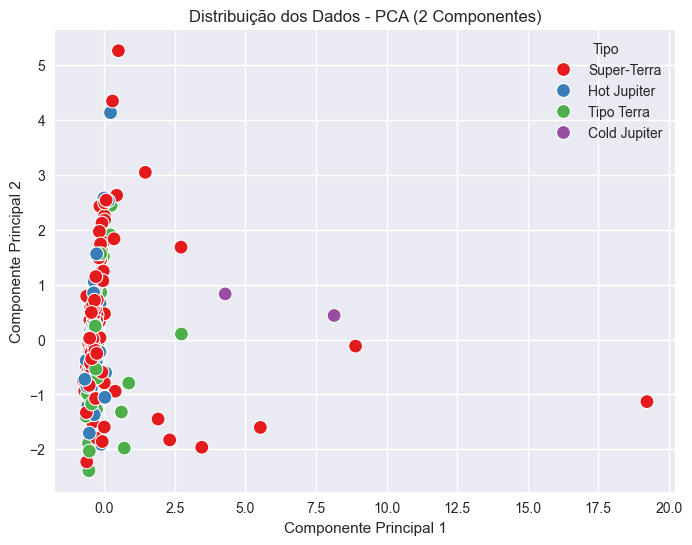

C:\Users\Usuario\AppData\Local\Temp\ipykernel_10868\1665850867.py:30: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=y_train_filtered, palette='Set2')


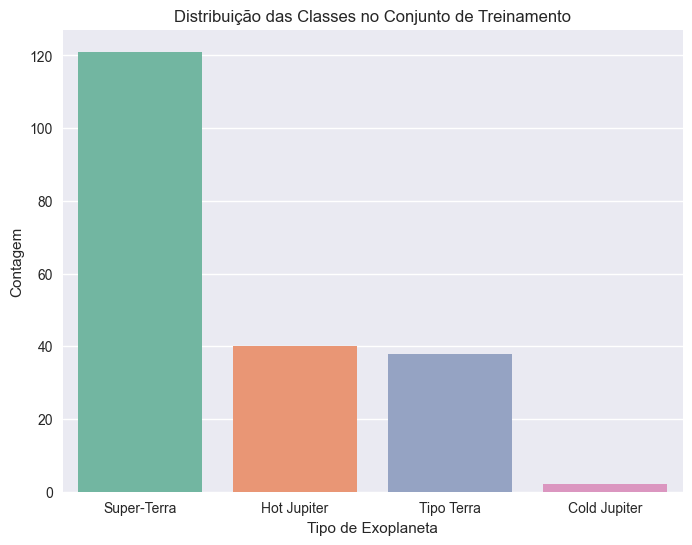

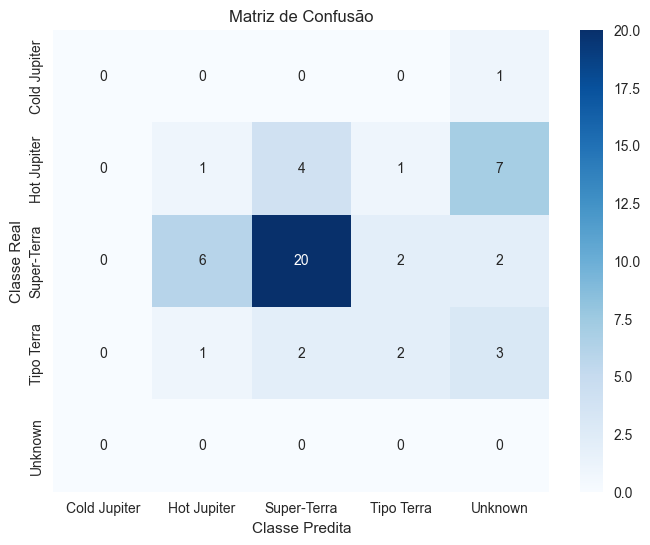

In [485]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.metrics import confusion_matrix

# Filtrar as amostras "Unknown"
X_train_filtered = X_train_scaled[y_train != 'Unknown']
y_train_filtered = y_train[y_train != 'Unknown']
X_test_filtered = X_test_scaled[y_test != 'Unknown']
y_test_filtered = y_test[y_test != 'Unknown']

# Filtrar as previsões para corresponder ao conjunto de teste filtrado
y_pred_filtered = y_pred[y_test != 'Unknown']

# 1. Gráfico de dispersão das 2 primeiras componentes principais (PCA) para visualização
# Usando PCA para reduzir a dimensionalidade dos dados para 2 componentes
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_train_filtered)

plt.figure(figsize=(8, 6))
sns.scatterplot(x=X_pca[:, 0], y=X_pca[:, 1], hue=y_train_filtered, palette='Set1', s=100)
plt.title('Distribuição dos Dados - PCA (2 Componentes)')
plt.xlabel('Componente Principal 1')
plt.ylabel('Componente Principal 2')
plt.legend(title='Tipo', loc='best')
plt.show()

# 2. Gráfico de barras para mostrar a distribuição das classes
plt.figure(figsize=(8, 6))
sns.countplot(x=y_train_filtered, palette='Set2')
plt.title('Distribuição das Classes no Conjunto de Treinamento')
plt.xlabel('Tipo de Exoplaneta')
plt.ylabel('Contagem')
plt.show()

# 3. Matriz de Confusão
plt.figure(figsize=(8, 6))
cm = confusion_matrix(y_test_filtered, y_pred_filtered)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=knn.classes_, yticklabels=knn.classes_)
plt.title('Matriz de Confusão')
plt.xlabel('Classe Predita')
plt.ylabel('Classe Real')
plt.show()

## aaa

In [479]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix

# Ajustando a função de classificação para usar as colunas de massa e período
def classify_exoplanet(row):
    # Hot Jupiters: Massa ~ 1MJ e Período ~ 3 dias
    if row['pl_massj'] >= 0.8 and row['pl_massj'] <= 1.2 and row['pl_orbper'] <= 3:
        return 'Hot Jupiter'
    
    # Long Period Giants: Massa ~ 1MJ e Período > 100 dias
    elif row['pl_massj'] >= 0.8 and row['pl_massj'] <= 1.2 and row['pl_orbper'] > 100:
        return 'Long Period Giant'
    
    # Non-Giants: Todos os outros exoplanetas
    return 'Non-Giant'

# Adicionando as colunas 'pl_massj' e 'pl_orbper' ao DataFrame
df_filtered_3['Type'] = df_filtered_3.apply(classify_exoplanet, axis=1)

# Filtrando apenas as colunas relevantes
relevant_columns = ['pl_radj', 'pl_tranmid', 'pl_ratdor', 'st_teff', 'sy_dist', 'Type']
df_filtered = df_filtered_3[relevant_columns].dropna()

# Separando X (features) e y (rótulos)
X = df_filtered[['pl_radj', 'pl_tranmid', 'pl_ratdor', 'st_teff', 'sy_dist']]  # Features
y = df_filtered['Type']  # Rótulos

# Dividindo em conjunto de treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Print do número de amostras em treinamento e teste
print(f"Número de amostras no conjunto de treinamento: {X_train.shape[0]}")
print(f"Número de amostras no conjunto de teste: {X_test.shape[0]}")

# Escalando os dados
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Criando o modelo KNN
knn = KNeighborsClassifier(n_neighbors=5)  # 5 vizinhos como exemplo
knn.fit(X_train_scaled, y_train)

# Predizendo os resultados
y_pred = knn.predict(X_test_scaled)

# Avaliando o modelo
print("\nRelatório de Classificação:")
print(classification_report(y_test, y_pred))
print("\nMatriz de Confusão:")
print(confusion_matrix(y_test, y_pred))

Número de amostras no conjunto de treinamento: 923
Número de amostras no conjunto de teste: 231

Relatório de Classificação:
                   precision    recall  f1-score   support

      Hot Jupiter       0.00      0.00      0.00         6
Long Period Giant       0.00      0.00      0.00         2
        Non-Giant       0.97      1.00      0.98       223

         accuracy                           0.96       231
        macro avg       0.32      0.33      0.33       231
     weighted avg       0.93      0.96      0.95       231


Matriz de Confusão:
[[  0   0   6]
 [  0   0   2]
 [  1   0 222]]


C:\Users\Usuario\AppData\Local\Temp\ipykernel_10868\2612130143.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered_3['Type'] = df_filtered_3.apply(classify_exoplanet, axis=1)
c:\Users\Usuario\Desktop\tcc\exoplanets-classifier\.conda\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\Usuario\Desktop\tcc\exoplanets-classifier\.conda\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted 